# Digital Green Crop Yield Estimate Challenge

 Lien: https://zindi.africa/competitions/digital-green-crop-yield-estimate-challenge

I - Introduction:

Dans le compte rendu qui suit, notre objectif est de développer une solution d'apprentissage automatique visant à prédire le rendement par acre des cultures de riz ou de blé en Inde. Nous utilisons les données disponibles sur le site "Zindi" pour alimenter notre analyse. Nous débuterons par une phase d'analyse exploratoire des données afin de visualiser de manière approfondie nos informations. Par la suite, nous nous attacherons à l'entraînement d'un modèle afin d'optimiser la précision de nos prédictions.

Avant d'entamer notre démarche, importons l'ensemble des bibliothèques nécessaires ainsi que le fichier contenant notre code et nos données, éléments essentiels pour la suite de notre travail.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
#importation du fichier depuis drive
# lien
!gdown https://drive.google.com/u/0/uc?id=1QidjncEImOgvkaBUKvczMPe-jhwIkLfs
!gdown https://drive.google.com/u/0/uc?id=1-QvN2j5mJGCSnlRn3j6gatmziUoqs5hF
!gdown https://drive.google.com/u/0/uc?id=18xIxTnsl50-14A_6HOsXF695FUljAWkN
!gdown 12xjcks04ovvGD9XMZk1SA-VzgosskEjT
!gdown 1bCvSa5J_r_5thOc7rJpDWcg2c_7hKtCE
!gdown 1O4M5aBkqsa8lAC14iWa0eeFBrCYzO5QG

Downloading...
From: https://drive.google.com/u/0/uc?id=1QidjncEImOgvkaBUKvczMPe-jhwIkLfs
To: /content/Train.csv
100% 1.57M/1.57M [00:00<00:00, 143MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1-QvN2j5mJGCSnlRn3j6gatmziUoqs5hF
To: /content/Test.csv
100% 518k/518k [00:00<00:00, 130MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=18xIxTnsl50-14A_6HOsXF695FUljAWkN
To: /content/VariableDescription.csv
100% 2.79k/2.79k [00:00<00:00, 12.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=12xjcks04ovvGD9XMZk1SA-VzgosskEjT
To: /content/manifest-791977bdaaa868446d787f0618161fe720230912-4562-s64syz.json
100% 1.76k/1.76k [00:00<00:00, 7.92MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bCvSa5J_r_5thOc7rJpDWcg2c_7hKtCE
To: /content/DigitalGreen_Starter_Notebook.ipynb
100% 39.3k/39.3k [00:00<00:00, 75.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1O4M5aBkqsa8lAC14iWa0eeFBrCYzO5QG
To: /content/SampleSubmission.csv
100% 23.2k/23.2k [00:00<00

Ce dernier est nécéssaire pour la submission que l'on va faire.

In [ ]:
# Load files
data_path = ''
data = pd.read_csv(data_path + 'Train.csv')
test = pd.read_csv(data_path + 'Test.csv')
sample_submission = pd.read_csv(data_path + 'SampleSubmission.csv')
var_desc = pd.read_csv(data_path + 'VariableDescription.csv')

### II. ANALYSE EXPLORATOIRE DES DONNÉES :
### II-1. Examen et Compréhension des Données

Passons maintenant à l'examen approfondi et à la compréhension des données. Cette phase cruciale de l'analyse exploratoire vise à dévoiler les caractéristiques essentielles des informations recueillies et à fournir des insights significatifs.


- Exploration des variables :

Au cours de cette étape, nous identifierons les variables clés, examinerons la distribution des données et repérerons d'éventuelles tendances ou "outliers". Cela nous permettra d'acquérir une vision plus précise de la nature des données à notre disposition.

Tout d'abord, nous débuterons par l'Analyse de forme.

### Analyse de forme:

Dans le cadre de l'Analyse de forme, notre première étape consistera à identifier la variable cible, ainsi qu'à effectuer une analyse générale du tableau.


#### Identification du variable cibles(target)

In [ ]:
df=data.copy()

In [ ]:
pd.set_option('display.max_columns',50)

In [ ]:
df.head()

ID District      Block  CultLand  CropCultLand  \
0  ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
1  ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
2  ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
3  ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   
4  ID_4T8YQWXWHB4A  Nalanda  Noorsarai        60            60   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   
4                   TractorPlough WetTillagePuddling      2022-07-19   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledRandom    2022-06-17   
4                 4  Manual_PuddledRandom    2022-06-21   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21              2.0   
1                 2022-07-20              2.0   
2                 2022-08-13              2.0   
3                 2022-07-17              2.0   
4                 2022-07-20              2.0   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
4  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
2  SeedlingAge IrrigWaterAvailability LaborAvaila...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge RainArrival IrrigWaterAvailability...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           5.0                        Boring   
1                           5.0                        Boring   
2                           4.0                        Boring   
3                           NaN                           NaN   
4                           9.0                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric          200.0            2.0   
1                           Electric          125.0            3.0   
2                           Electric           80.0            2.0   
3                                NaN            NaN            NaN   
4                           Electric          300.0            2.0   

  OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
0            NaN      NaN         NaN                        NaN   
1            NaN      NaN         NaN                        NaN   
2    Ganaura FYM      1.0         1.0                SoilApplied   
3        Ganaura      1.0         NaN                SoilApplied   
4            NaN      NaN         NaN                        NaN   

   NoFertilizerAppln CropbasalFerts  BasalDAP  BasalUrea MineralFertAppMethod  \
0                  2           Urea       NaN       20.0         Broadcasting   
1                  2       DAP Urea      15.0       10.0         Broadcasting   
2                  2            DAP       4.0        NaN          SoilApplied   
3                  2       DAP Urea       6.0        3.0         Broadcasting   
4                  2       Urea DAP      15.0       30.0         Broadcasting   

  FirstTopDressFert  1tdUrea  1appDaysUrea  2tdUrea  2appDaysUrea  \
0              Urea     15.0          18.0      NaN           NaN   
1              U

Il semble évident dans le contexte que la colonne "yield" est notre variable cible, car notre objectif consiste à développer une solution d'apprentissage automatique visant à prédire le rendement des cultures par acre.


#### Analyse du tableau

In [ ]:
df.shape

(3870, 44)

Nous disposons d'un tableau comportant 3870 lignes et 44 colonnes à examiner.


In [ ]:
df.dtypes.value_counts()

object     23
float64    14
int64       7
dtype: int64

On a ici 23 variables quantitatives et 21 variables qualitatives.

<Axes: >

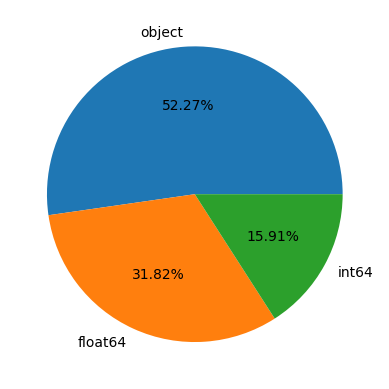

In [ ]:
def pct(pct):
    return str(round(pct, 2)) + '%'
df.dtypes.value_counts().plot.pie(autopct=pct)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3870 entries, 0 to 3869
Data columns (total 44 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  3870 non-null   object 
 1   District                            3870 non-null   object 
 2   Block                               3870 non-null   object 
 3   CultLand                            3870 non-null   int64  
 4   CropCultLand                        3870 non-null   int64  
 5   LandPreparationMethod               3870 non-null   object 
 6   CropTillageDate                     3870 non-null   object 
 7   CropTillageDepth                    3870 non-null   int64  
 8   CropEstMethod                       3870 non-null   object 
 9   RcNursEstDate                       3787 non-null   object 
 10  SeedingSowingTransplanting          3870 non-null   object 
 11  SeedlingsPerPit                     3581 no

Nous travaillons avec un tableau qui englobe trois types de variables : int64, float64, et objet. Les variables qualitatives sont plus nombreuses que les variables quantitatives.

Passons maintenant à l'identification des valeurs manquantes.

##### Analyses des valeurs manquantes

<Axes: >

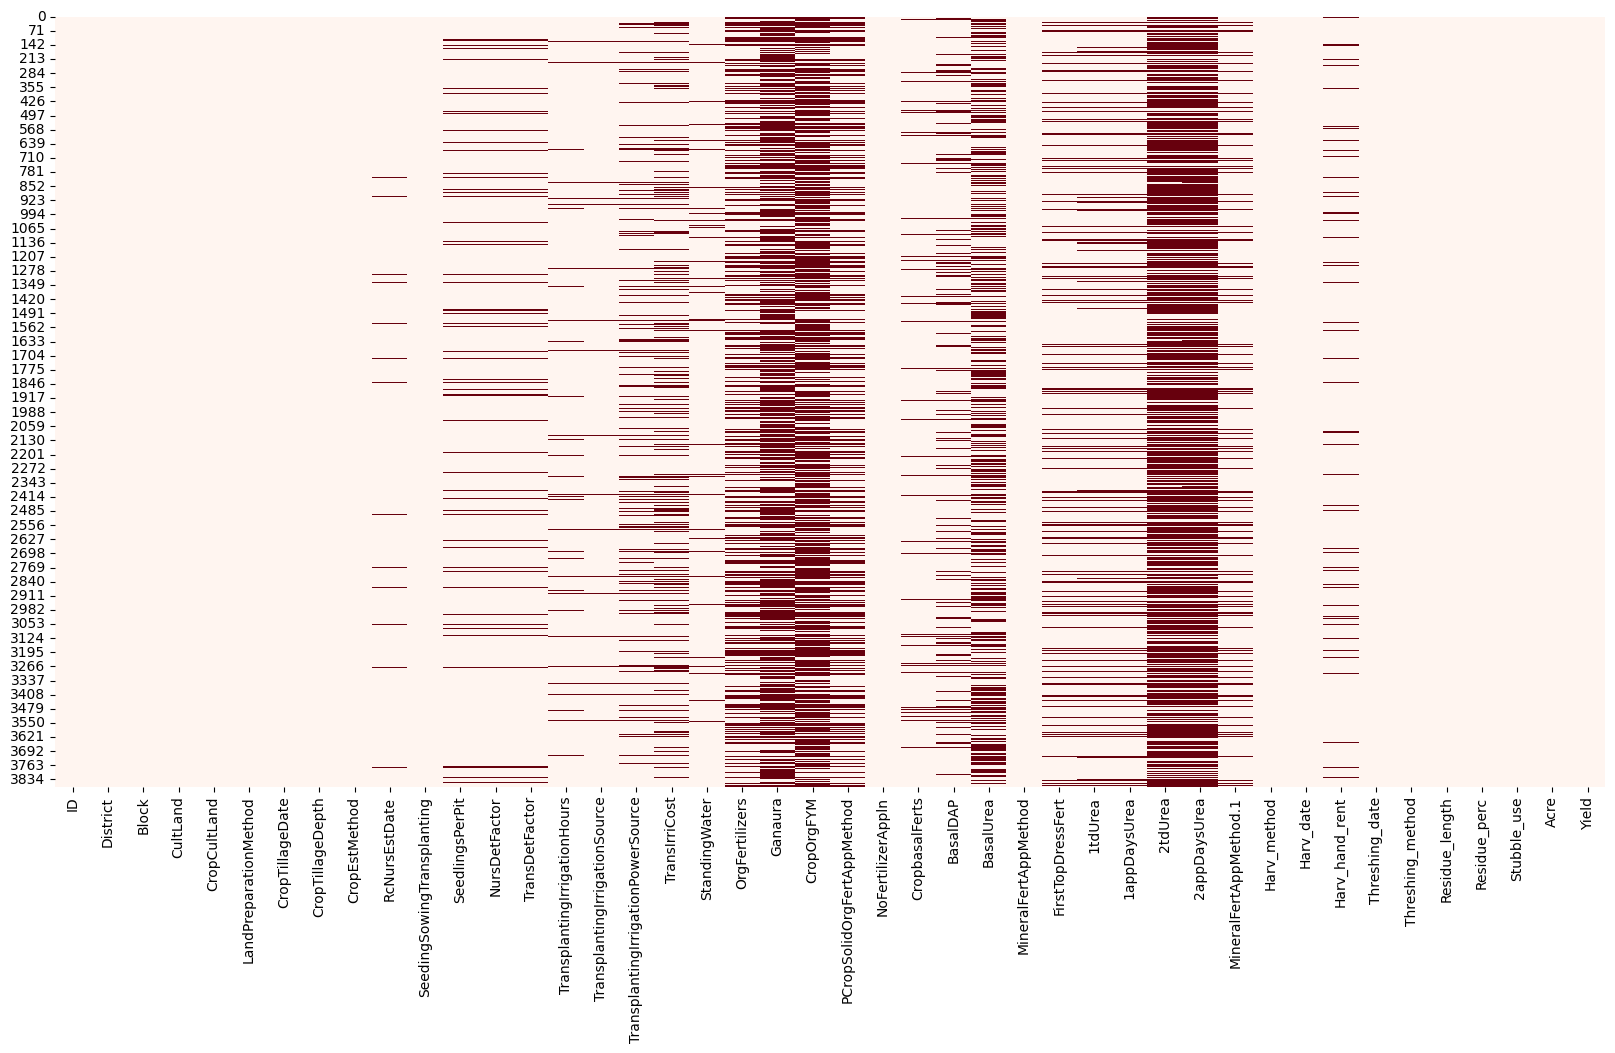

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cmap='Reds',cbar=False)


Les valeurs manquantes sont signalées en rouge.Pourtant le schéma est encore difficile à interpréter. Pour une analyse plus approfondie, explorons le avec d'autres outils.

In [ ]:
#Pour  regader les valeur manquantes dans le tableau.
df.isna()

ID  District  Block  CultLand  CropCultLand  LandPreparationMethod  \
0     False     False  False     False         False                  False   
1     False     False  False     False         False                  False   
2     False     False  False     False         False                  False   
3     False     False  False     False         False                  False   
4     False     False  False     False         False                  False   
...     ...       ...    ...       ...           ...                    ...   
3865  False     False  False     False         False                  False   
3866  False     False  False     False         False                  False   
3867  False     False  False     False         False                  False   
3868  False     False  False     False         False                  False   
3869  False     False  False     False         False                  False   

      CropTillageDate  CropTillageDepth  CropEstMethod  RcNursEstDate  \
0               False             False          False          False   
1               False             False          False          False   
2               False             False          False          False   
3               False             False          False          False   
4               False             False          False          False   
...               ...               ...            ...            ...   
3865            False             False          False          False   
3866            False             False          False          False   
3867            False             False          False          False   
3868            False             False          False          False   
3869            False             False          False          False   

      SeedingSowingTransplanting  SeedlingsPerPit  NursDetFactor  \
0                          False            False          False   
1                          False            False          False   
2                          False            False          False   
3                          False            False          False   
4                          False            False          False   
...                          ...              ...            ...   
3865                       False             True           True   
3866                       False            False          False   
3867                       False            False          False   
3868                       False            False          False   
3869                       False            False          False   

      TransDetFactor  TransplantingIrrigationHours  \
0              False                         False   
1              False                         False   
2              False                         False   
3              False                          True   
4              False                         False   
...              ...                           ...   
3865            True                         False   
3866           False                         False   
3867           False                         False   
3868           False                         False   
3869           False                         False   

      TransplantingIrrigationSource  TransplantingIrrigationPowerSource  \
0                             False                               False   
1                             False                               False   
2                             False                               False   
3                              True                                True   
4                             False                               False   
...                             ...                                 ...   
3865                          False                               False   
3866                          False                               False   
3867                          False       

In [ ]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

ID                                    0.000000
Stubble_use                           0.000000
Residue_perc                          0.000000
Residue_length                        0.000000
Threshing_method                      0.000000
Threshing_date                        0.000000
Harv_date                             0.000000
Harv_method                           0.000000
MineralFertAppMethod                  0.000000
NoFertilizerAppln                     0.000000
Acre                                  0.000000
Yield                                 0.000000
CropEstMethod                         0.000000
District                              0.000000
Block                                 0.000000
CultLand                              0.000000
CropCultLand                          0.000000
LandPreparationMethod                 0.000000
SeedingSowingTransplanting            0.000000
CropTillageDate                       0.000000
CropTillageDepth                      0.000000
RcNursEstDate

On constate la présence de près de 70% de valeurs manquantes dans les colonnes : "Ganaura", "CropOrgFYM", "2tdUrea", "2appDaysUrea". Avec seulement 30% de données disponibles dans le tableau, ces colonnes pourraient ne pas apporter une contribution significative. Avant d'opter pour leur élimination, nous allons procéder à une analyse approfondie, et si elles semblent non pertinentes, nous les exclurons.

##### Analyse des colonnes contenant preque 70% de valeurs manquantes:

In [ ]:
df.tail()

ID  District      Block  CultLand  CropCultLand  \
3865  ID_7ZZQ6R4XB4FK   Nalanda     Rajgir        28            28   
3866  ID_PVVDF6LK6FO8  Vaishali      Mahua         5             5   
3867  ID_RBYVUPRATVMW   Nalanda  Noorsarai        50            45   
3868  ID_ARE9QWENJNJ2     Jamui     Khaira        20            20   
3869  ID_KEPOQDTCZC6S     Jamui      Jamui         4             4   

                                  LandPreparationMethod CropTillageDate  \
3865  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-02   
3866  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-06   
3867                                      TractorPlough      2022-07-07   
3868                                      TractorPlough      2022-07-12   
3869                                      TractorPlough      2022-07-24   

      CropTillageDepth           CropEstMethod RcNursEstDate  \
3865                 6  LineSowingAfterTillage    2022-06-29   
3866                 5    Manual_PuddledRandom    2022-07-08   
3867                 5    Manual_PuddledRandom    2022-06-15   
3868                 3    Manual_PuddledRandom    2022-06-28   
3869                 4    Manual_PuddledRandom    2022-06-25   

     SeedingSowingTransplanting  SeedlingsPerPit  \
3865                 2022-07-16              NaN   
3866                 2022-07-30              1.0   
3867                 2022-07-08              1.0   
3868                 2022-07-24              4.0   
3869                 2022-07-28             10.0   

                                  NursDetFactor  \
3865                                        NaN   
3866  IrrigWaterAvailability LabourAvailability   
3867        CalendarDate IrrigWaterAvailability   
3868    SeedAvailability IrrigWaterAvailability   
3869   PreMonsoonShowers IrrigWaterAvailability   

                                      TransDetFactor  \
3865                                             NaN   
3866        IrrigWaterAvailability LaborAvailability   
3867             CalendarDate IrrigWaterAvailability   
3868  IrrigWaterAvailability RainArrival SeedlingAge   
3869                         SeedlingAge RainArrival   

      TransplantingIrrigationHours TransplantingIrrigationSource  \
3865                           7.0                        Boring   
3866                           3.0                        Boring   
3867                           6.0                        Boring   
3868                           2.0                         Canal   
3869                           5.0                        Boring   

     TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
3865                           Electric          360.0            5.0   
3866                             Diesel            NaN            3.0   
3867                           Electric          120.0            5.0   
3868                                NaN            NaN            9.0   
3869                           Electric          500.0            2.0   

     OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
3865        Ganaura      1.0         NaN                SoilApplied   
3866            NaN      NaN         NaN                        NaN   
3867        Ganaura      1.0         NaN               Broadcasting   
3868            NaN      NaN         NaN                        NaN   
3869            NaN      NaN         NaN                        NaN   

      NoFertilizerAppln CropbasalFerts  BasalDAP  BasalUrea  \
3865                  2       DAP Urea      18.0       12.0   
3866                  3            DAP       6.0        NaN   
3867                  1           Urea       NaN       24.0   
3868                  1       DAP Urea       7.0       10.0   
3869                  2       DAP Urea      10.0       10.0   

     MineralFertAppMethod FirstTopDressFert  1tdUrea  1appDaysUrea  2tdUrea  \
3865         Broadcasting              Urea     12.0          45.0      

Analysons les colonnes avec seulement 30% de données. Selon nos recherches sur internet :

   - Dans le contexte de l'agriculture, la colonne "2 applications par jour d'urée" semble être une recommandation de fertilisation. L'urée, un engrais azoté, est généralement appliquée deux fois par jour pour stimuler la croissance des plantes, matin et soir. Cette colonne est donc importante pour l'amélioration du rendement.

   - Dans le domaine agricole, le terme "Ganaura" désigne une technique de culture consistant à planter des arbres fruitiers ou des arbustes entre les rangées de cultures.

   - Le terme "CropOrgFYM" est un acronyme signifiant "Crop Organic Fertilizer and Manure". Il fait référence à un type d'engrais biologique composé de matière organique, tel que du fumier, du compost et des résidus de cultures. Les engrais CropOrgFYM sont utilisés pour améliorer la fertilité du sol, augmenter la productivité des cultures et réduire la pollution.

     -La "2tdUrea" est une forme d'urée traitée avec de la formaldéhyde. Cette réaction chimique rend l'urée plus soluble et plus stable. La 2tdUrea est également moins volatile que l'urée, ce qui réduit le risque de décomposition dans le sol.

On constate que les colonnes présentant près de 70% de valeurs manquantes concernent la fertilisation du sol, élément crucial pour améliorer le rendement agricole. Par conséquent, nous conservons ces colonnes dans notre analyse.


### Analyse du Fond:

In [ ]:
df.head()

ID District      Block  CultLand  CropCultLand  \
0  ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
1  ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   
2  ID_1FJY2CRIMLZZ     Gaya      Gurua        10            10   
3  ID_I3IPXS4DB7NE     Gaya      Gurua        15            15   
4  ID_4T8YQWXWHB4A  Nalanda  Noorsarai        60            60   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   
2               TractorPlough FourWheelTracRotavator      2022-06-30   
3               TractorPlough FourWheelTracRotavator      2022-06-16   
4                   TractorPlough WetTillagePuddling      2022-07-19   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   
2                 6  Manual_PuddledRandom    2022-06-20   
3                 6  Manual_PuddledRandom    2022-06-17   
4                 4  Manual_PuddledRandom    2022-06-21   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21              2.0   
1                 2022-07-20              2.0   
2                 2022-08-13              2.0   
3                 2022-07-17              2.0   
4                 2022-07-20              2.0   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
2  PreMonsoonShowers IrrigWaterAvailability Labou...   
3  CalendarDate PreMonsoonShowers IrrigWaterAvail...   
4  CalendarDate IrrigWaterAvailability SeedAvaila...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   
2  SeedlingAge IrrigWaterAvailability LaborAvaila...   
3  CalendarDate SeedlingAge RainArrival IrrigWate...   
4  SeedlingAge RainArrival IrrigWaterAvailability...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           5.0                        Boring   
1                           5.0                        Boring   
2                           4.0                        Boring   
3                           NaN                           NaN   
4                           9.0                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric          200.0            2.0   
1                           Electric          125.0            3.0   
2                           Electric           80.0            2.0   
3                                NaN            NaN            NaN   
4                           Electric          300.0            2.0   

  OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
0            NaN      NaN         NaN                        NaN   
1            NaN      NaN         NaN                        NaN   
2    Ganaura FYM      1.0         1.0                SoilApplied   
3        Ganaura      1.0         NaN                SoilApplied   
4            NaN      NaN         NaN                        NaN   

   NoFertilizerAppln CropbasalFerts  BasalDAP  BasalUrea MineralFertAppMethod  \
0                  2           Urea       NaN       20.0         Broadcasting   
1                  2       DAP Urea      15.0       10.0         Broadcasting   
2                  2            DAP       4.0        NaN          SoilApplied   
3                  2       DAP Urea       6.0        3.0         Broadcasting   
4                  2       Urea DAP      15.0       30.0         Broadcasting   

  FirstTopDressFert  1tdUrea  1appDaysUrea  2tdUrea  2appDaysUrea  \
0              Urea     15.0          18.0      NaN           NaN   
1              U

#### Visualisation du target :

Notre variable cible est la colonne 'Yield'.


In [ ]:
df['Yield'].dtypes

dtype('int64')

Notre colonnes est de types int64 .

In [ ]:
df['Yield'].value_counts(normalize=True, ascending=True)

653     0.000258
596     0.000258
411     0.000258
2440    0.000258
1550    0.000258
          ...   
200     0.030233
600     0.036176
800     0.040310
300     0.040827
400     0.095090
Name: Yield, Length: 379, dtype: float64

Effectivement, pour une visualisation plus claire, il serait judicieux de représenter graphiquement notre variable cible 'Yield'. Cela facilitera la compréhension des tendances et des schémas qui pourraient être présents dans les données.


In [ ]:
df['Yield'].describe()

count     3870.000000
mean       594.269251
std        651.916953
min          4.000000
25%        300.000000
50%        425.000000
75%        740.000000
max      16800.000000
Name: Yield, dtype: float64

Nous observons un total de 3870 valeurs de rendement dans notre tableau. La moyenne est inférieure à l'écart type, indiquant ainsi une dispersion modérée des données. La distribution de notre colonne présente une asymétrie vers la droite, dénotant une distribution non normale. Dans ce contexte, la médiane du rendement fournit une mesure de tendance centrale plus robuste par rapport à la moyenne, celle-ci étant influencée par les valeurs extrêmes.


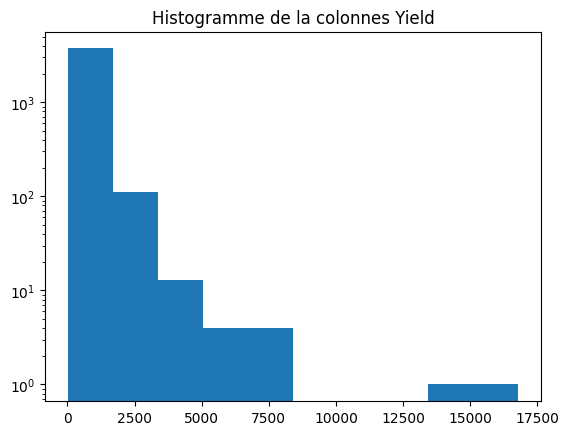

In [ ]:
plt.hist(df['Yield'])
plt.title("Histogramme de la colonnes Yield")
plt.yscale("log")
plt.show()

Nous constatons une dispersion importante dans la distribution des rendements, suggérant une grande variation. Cette diversité pourrait résulter de plusieurs facteurs. Pour une compréhension plus approfondie, nous analyserons par la suite la relation entre la variable cible et les différentes variables.


##### Analyse du variables quantitatives

In [ ]:
for col in df.select_dtypes('float'):
    print(col)

SeedlingsPerPit
TransplantingIrrigationHours
TransIrriCost
StandingWater
Ganaura
CropOrgFYM
BasalDAP
BasalUrea
1tdUrea
1appDaysUrea
2tdUrea
2appDaysUrea
Harv_hand_rent
Acre


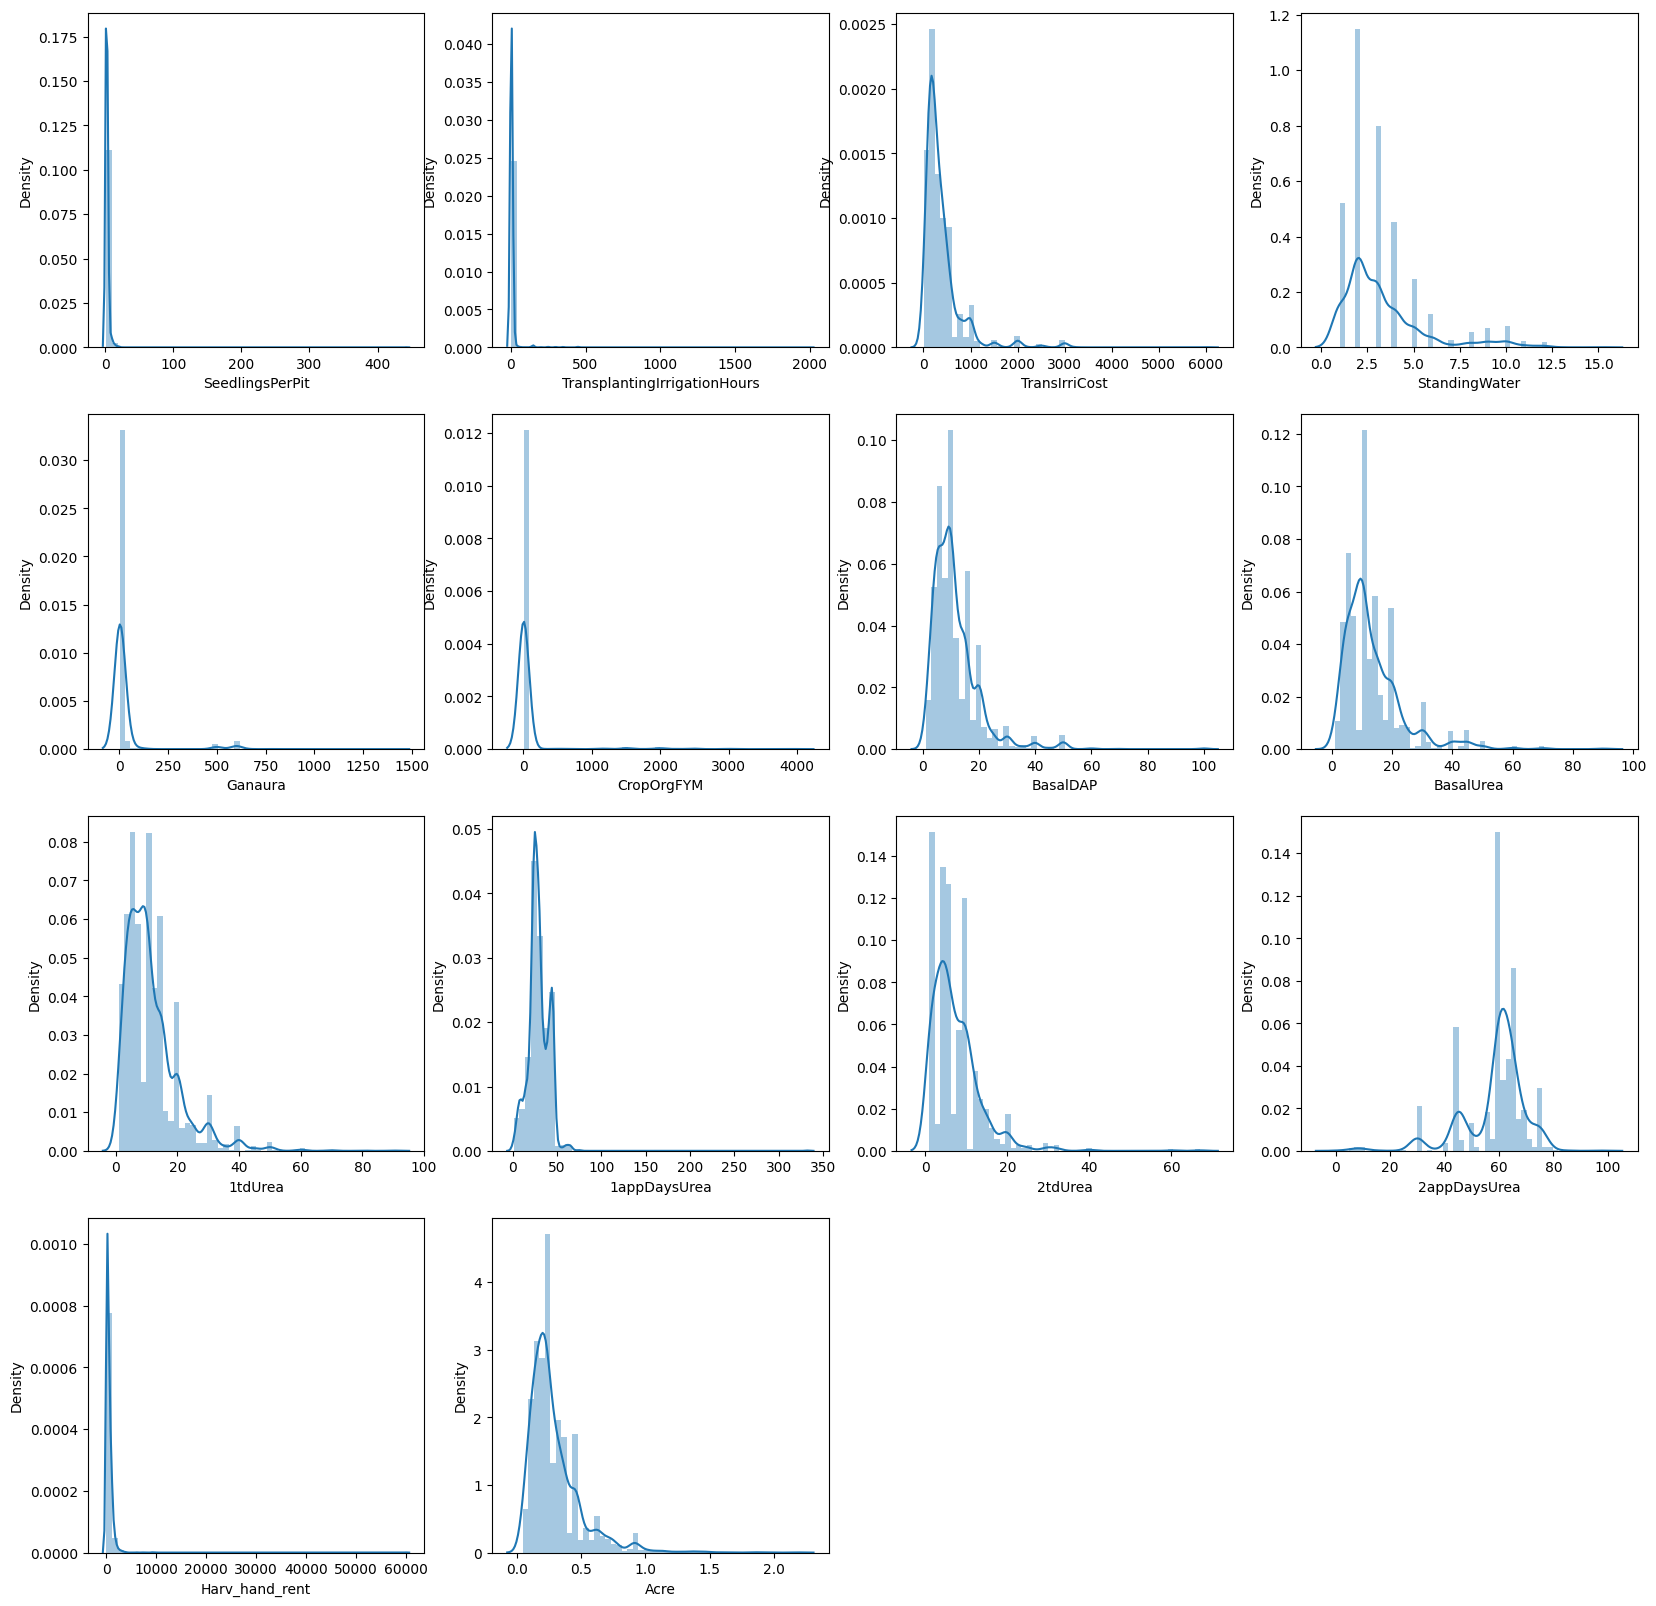

In [ ]:
i=1
plt.figure(figsize=(20,20))
for col in df.select_dtypes('float'):
    plt.subplot(4,4, i)
    sns.distplot(df[col])
    i += 1
plt.show()

Chaque graphique représente la distribution d'une variable. Sur l'axe horizontal, nous avons la valeur de la variable, tandis que l'axe vertical représente la fréquence d'apparition de cette valeur dans l'échantillon. Globalement, on observe que la majorité des cultures reçoivent des doses d'engrais relativement faibles, et que le niveau d'eau stagnante est généralement bas.

Environ 80% des cultures reçoivent entre 0 et 100 heures d'irrigation pendant la transplantation. De manière générale, toutes les distributions présentent une asymétrie. Cette analyse initiale nous donne un aperçu des tendances générales dans les données.

In [ ]:
for col in df.select_dtypes('int'):
    print(col)

CultLand
CropCultLand
CropTillageDepth
NoFertilizerAppln
Residue_length
Residue_perc
Yield


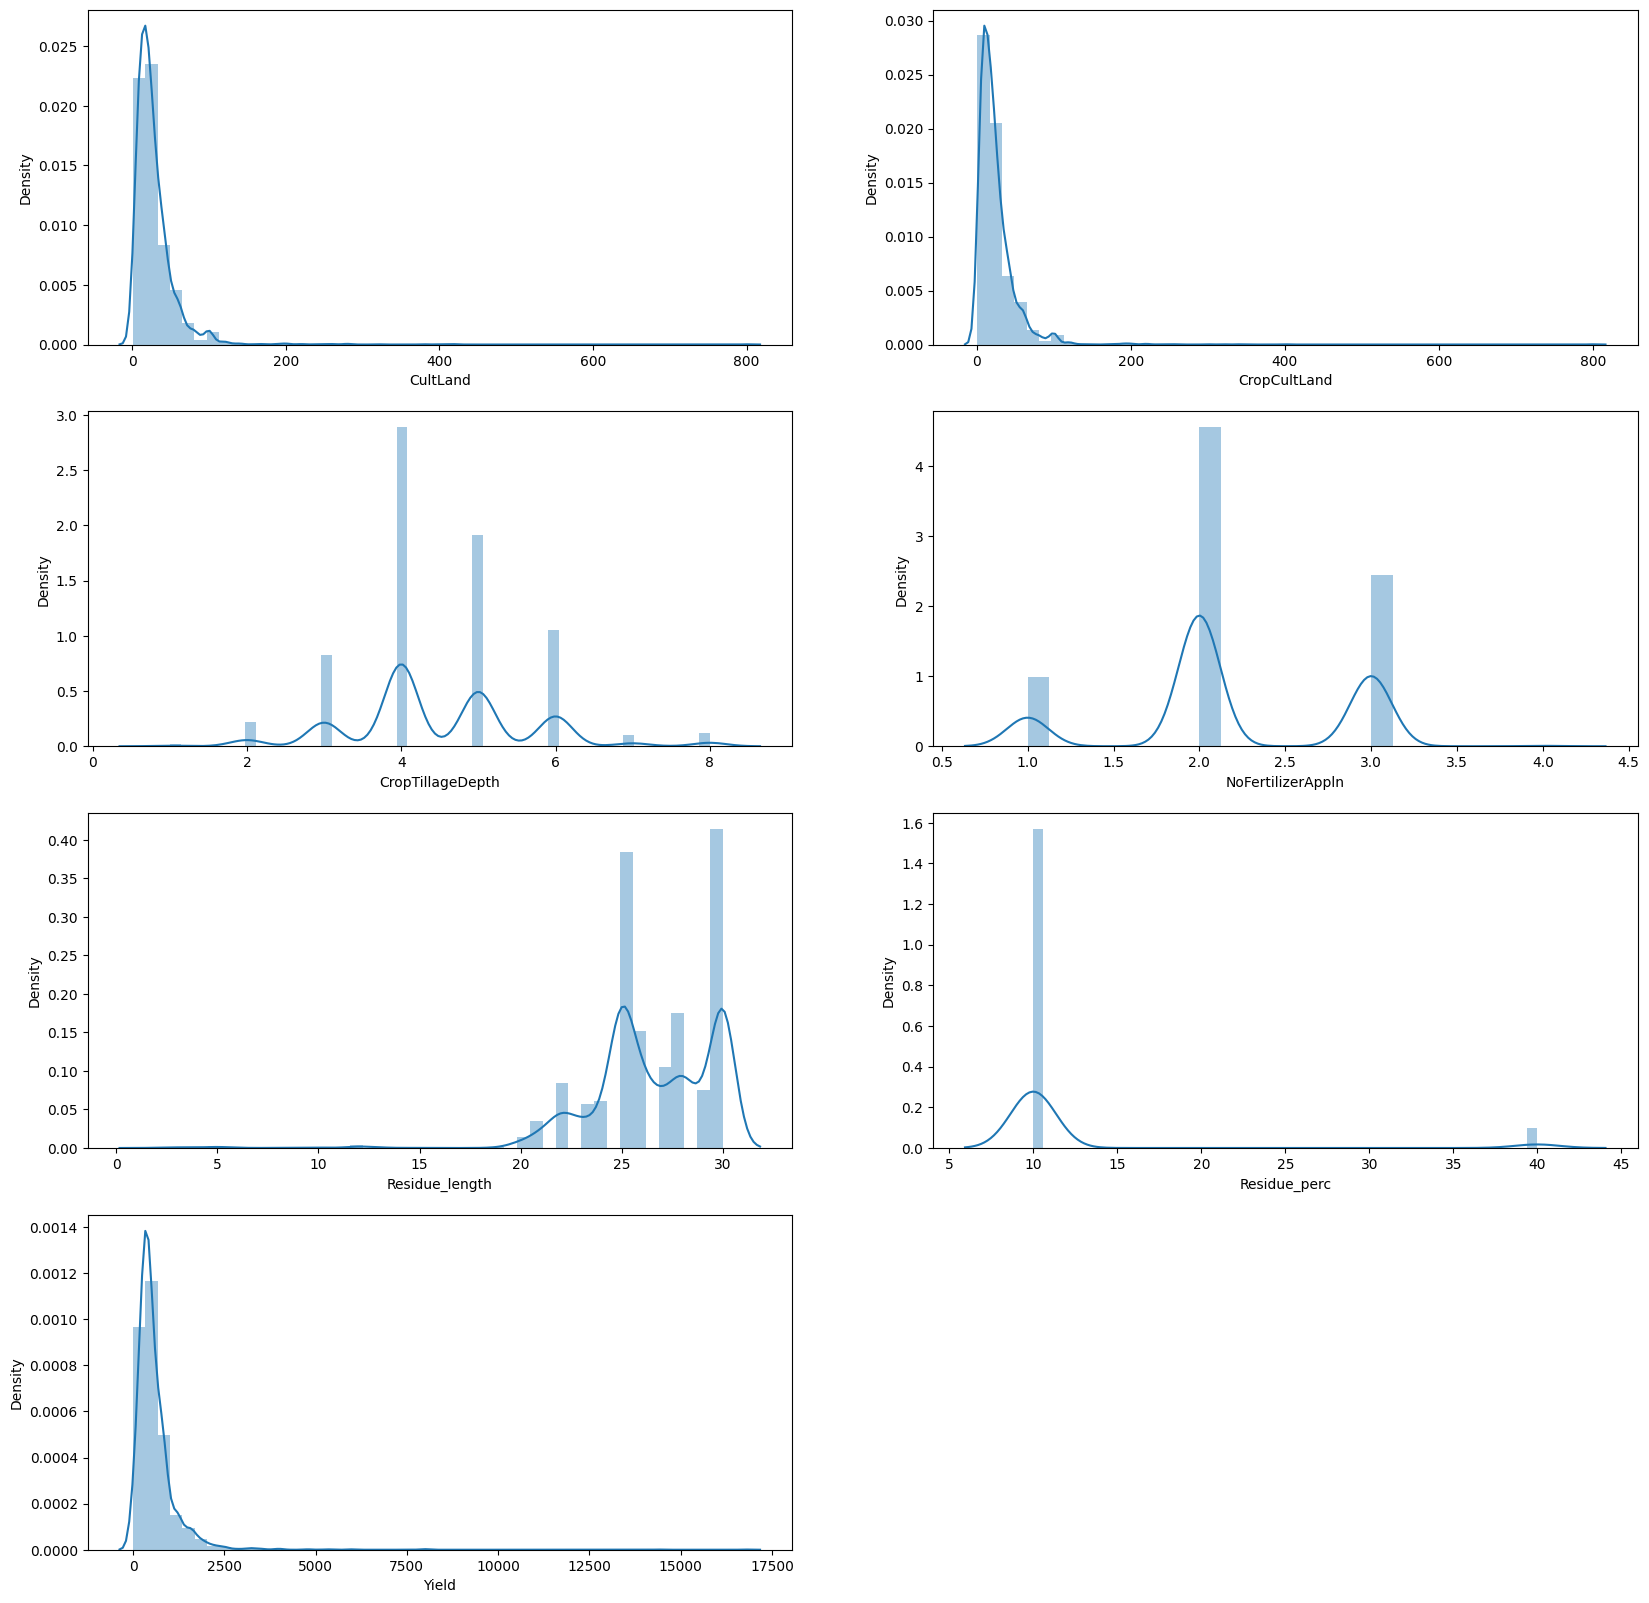

In [ ]:
i=1
plt.figure(figsize=(20,20))
for col in df.select_dtypes('int'):
    plt.subplot(4,2, i)
    sns.distplot(df[col])
    i += 1
plt.show()

L'image présente une série de graphiques illustrant l'impact de différents facteurs sur le rendement des cultures.

On observe que le rendement des cultures augmente proportionnellement à la superficie des terres cultivées, ce qui est compréhensible puisqu'une plus grande étendue offre davantage d'espace pour la culture.

Par ailleurs, le troisième graphique met en évidence l'effet positif de l'application d'engrais sur le rendement des cultures. En revanche, la profondeur du labour semble avoir un impact négatif, potentiellement en raison des dommages aux racines des cultures.

En ce qui concerne la longueur des résidus, le graphique indique un effet négatif sur le rendement des cultures. Cette observation peut s'expliquer par le fait que les résidus peuvent obstruer la lumière et l'eau, entravant ainsi la croissance des cultures.

Enfin, le dernier graphique suggère qu'une densité plus élevée des cultures peut optimiser l'utilisation de l'espace disponible et conduire à une augmentation de la production. Ces observations initiales fournissent des indications importantes sur les facteurs influençant le rendement des cultures.

##### Analyse du variables qualitatives

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col:-<30}{df[col].unique()}')


ID----------------------------['ID_GTFAC7PEVWQ9' 'ID_TK40ARLSPOKS' 'ID_1FJY2CRIMLZZ' ...
 'ID_RBYVUPRATVMW' 'ID_ARE9QWENJNJ2' 'ID_KEPOQDTCZC6S']
District----------------------['Nalanda' 'Gaya' 'Vaishali' 'Jamui']
Block-------------------------['Noorsarai' 'Rajgir' 'Gurua' 'Garoul' 'Khaira' 'Jamui' 'Mahua'
 'Chehrakala' 'Wazirganj']
LandPreparationMethod---------['TractorPlough FourWheelTracRotavator'
 'WetTillagePuddling TractorPlough FourWheelTracRotavator'
 'TractorPlough WetTillagePuddling' 'TractorPlough'
 'FourWheelTracRotavator' 'WetTillagePuddling'
 'TractorPlough BullockPlough'
 'WetTillagePuddling TractorPlough FourWheelTracRotavator BullockPlough'
 'WetTillagePuddling TractorPlough BullockPlough'
 'WetTillagePuddling TractorPlough' 'FourWheelTracRotavator TractorPlough'
 'WetTillagePuddling FourWheelTracRotavator'
 'WetTillagePuddling FourWheelTracRotavator BullockPlough TractorPlough'
 'WetTillagePuddling BullockPlough TractorPlough FourWheelTracRotavator'
 'TractorPlough We

In [ ]:
for col in df.select_dtypes('object'):
    print(col)

ID
District
Block
LandPreparationMethod
CropTillageDate
CropEstMethod
RcNursEstDate
SeedingSowingTransplanting
NursDetFactor
TransDetFactor
TransplantingIrrigationSource
TransplantingIrrigationPowerSource
OrgFertilizers
PCropSolidOrgFertAppMethod
CropbasalFerts
MineralFertAppMethod
FirstTopDressFert
MineralFertAppMethod.1
Harv_method
Harv_date
Threshing_date
Threshing_method
Stubble_use


On a obtenu toutes les colonnes de type objet avec les variables dans le tableau. Visualisons cela graphiquement. L'affichage semble complexe dans son ensemble, donc nous allons diviser les éléments des colonnes."


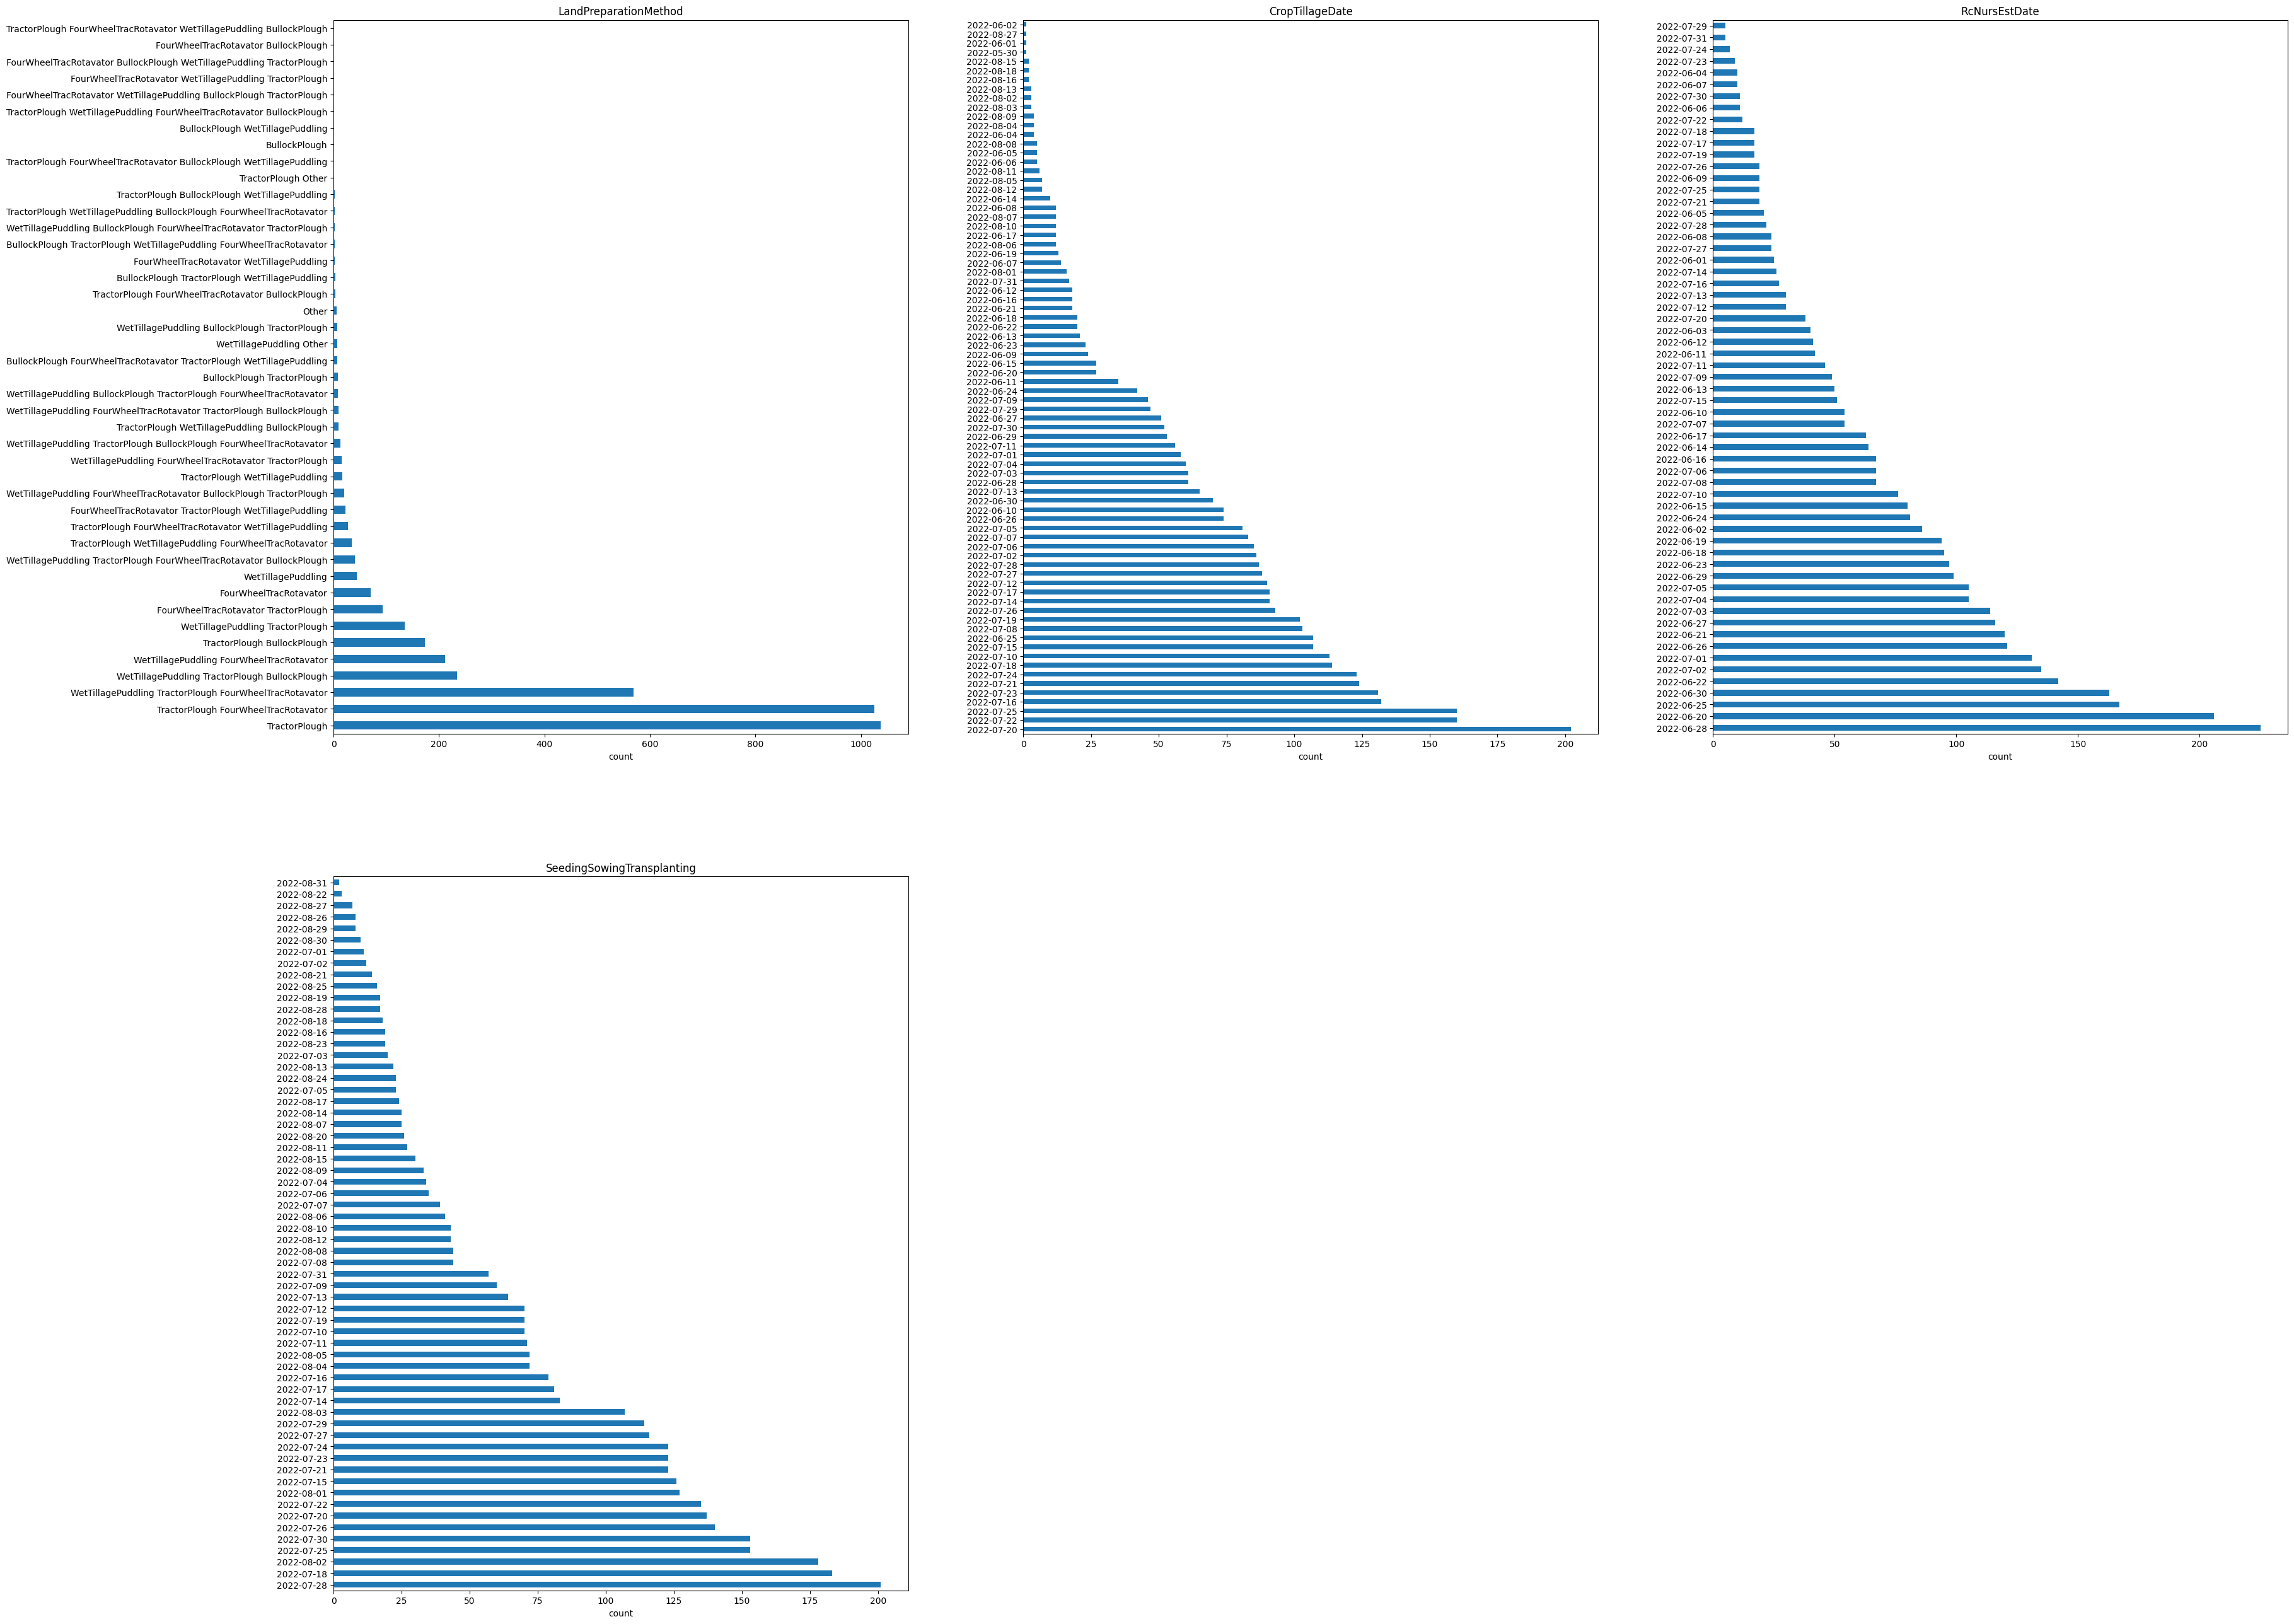

In [ ]:
i=1
plt.figure(figsize=(40,50))
for col in df[["LandPreparationMethod","CropTillageDate","RcNursEstDate","SeedingSowingTransplanting"]]:
    plt.subplot(3,3,i)
    df[col].value_counts().plot(kind="barh")
    plt.xlabel("count"),
    plt.title(col)
    i += 1
plt.show()

Pour la préparation du terrain, la méthode la plus couramment utilisée est "TractorPlough". Les alternatives telles que "TractorPlough WetTillagePuddling FourWheelTracRotavator BullockPlough" et "WetTillagePuddling BullockPlough TractorPlough" semblent être très négligeables, probablement en raison des contraintes budgétaires des agriculteurs.

En ce qui concerne le graphique relatif à la colonne "CropTillageDate", qui signifie "date de préparation des cultures" en français, il révèle une variation importante, mais la majorité des préparations se déroulent au cours du mois de juin, représentant ainsi la moitié de l'année, à partir du mois de mai.

Pour la représentation graphique de la colonne "RcNursEstDate", indiquant la date estimée à laquelle les semis seront prêts à être repiqués, cette date semble être principalement située en juin et juillet de chaque année, montrant une diversité significative.

En ce qui concerne le graphique associé à "SeedingSowingTransplanting", où seeding, sowing et transplanting font référence au processus de démarrage des plantes à partir de graines, l'utilisation de ces méthodes est également très variée, principalement observée pendant les mois d'août et de juillet.

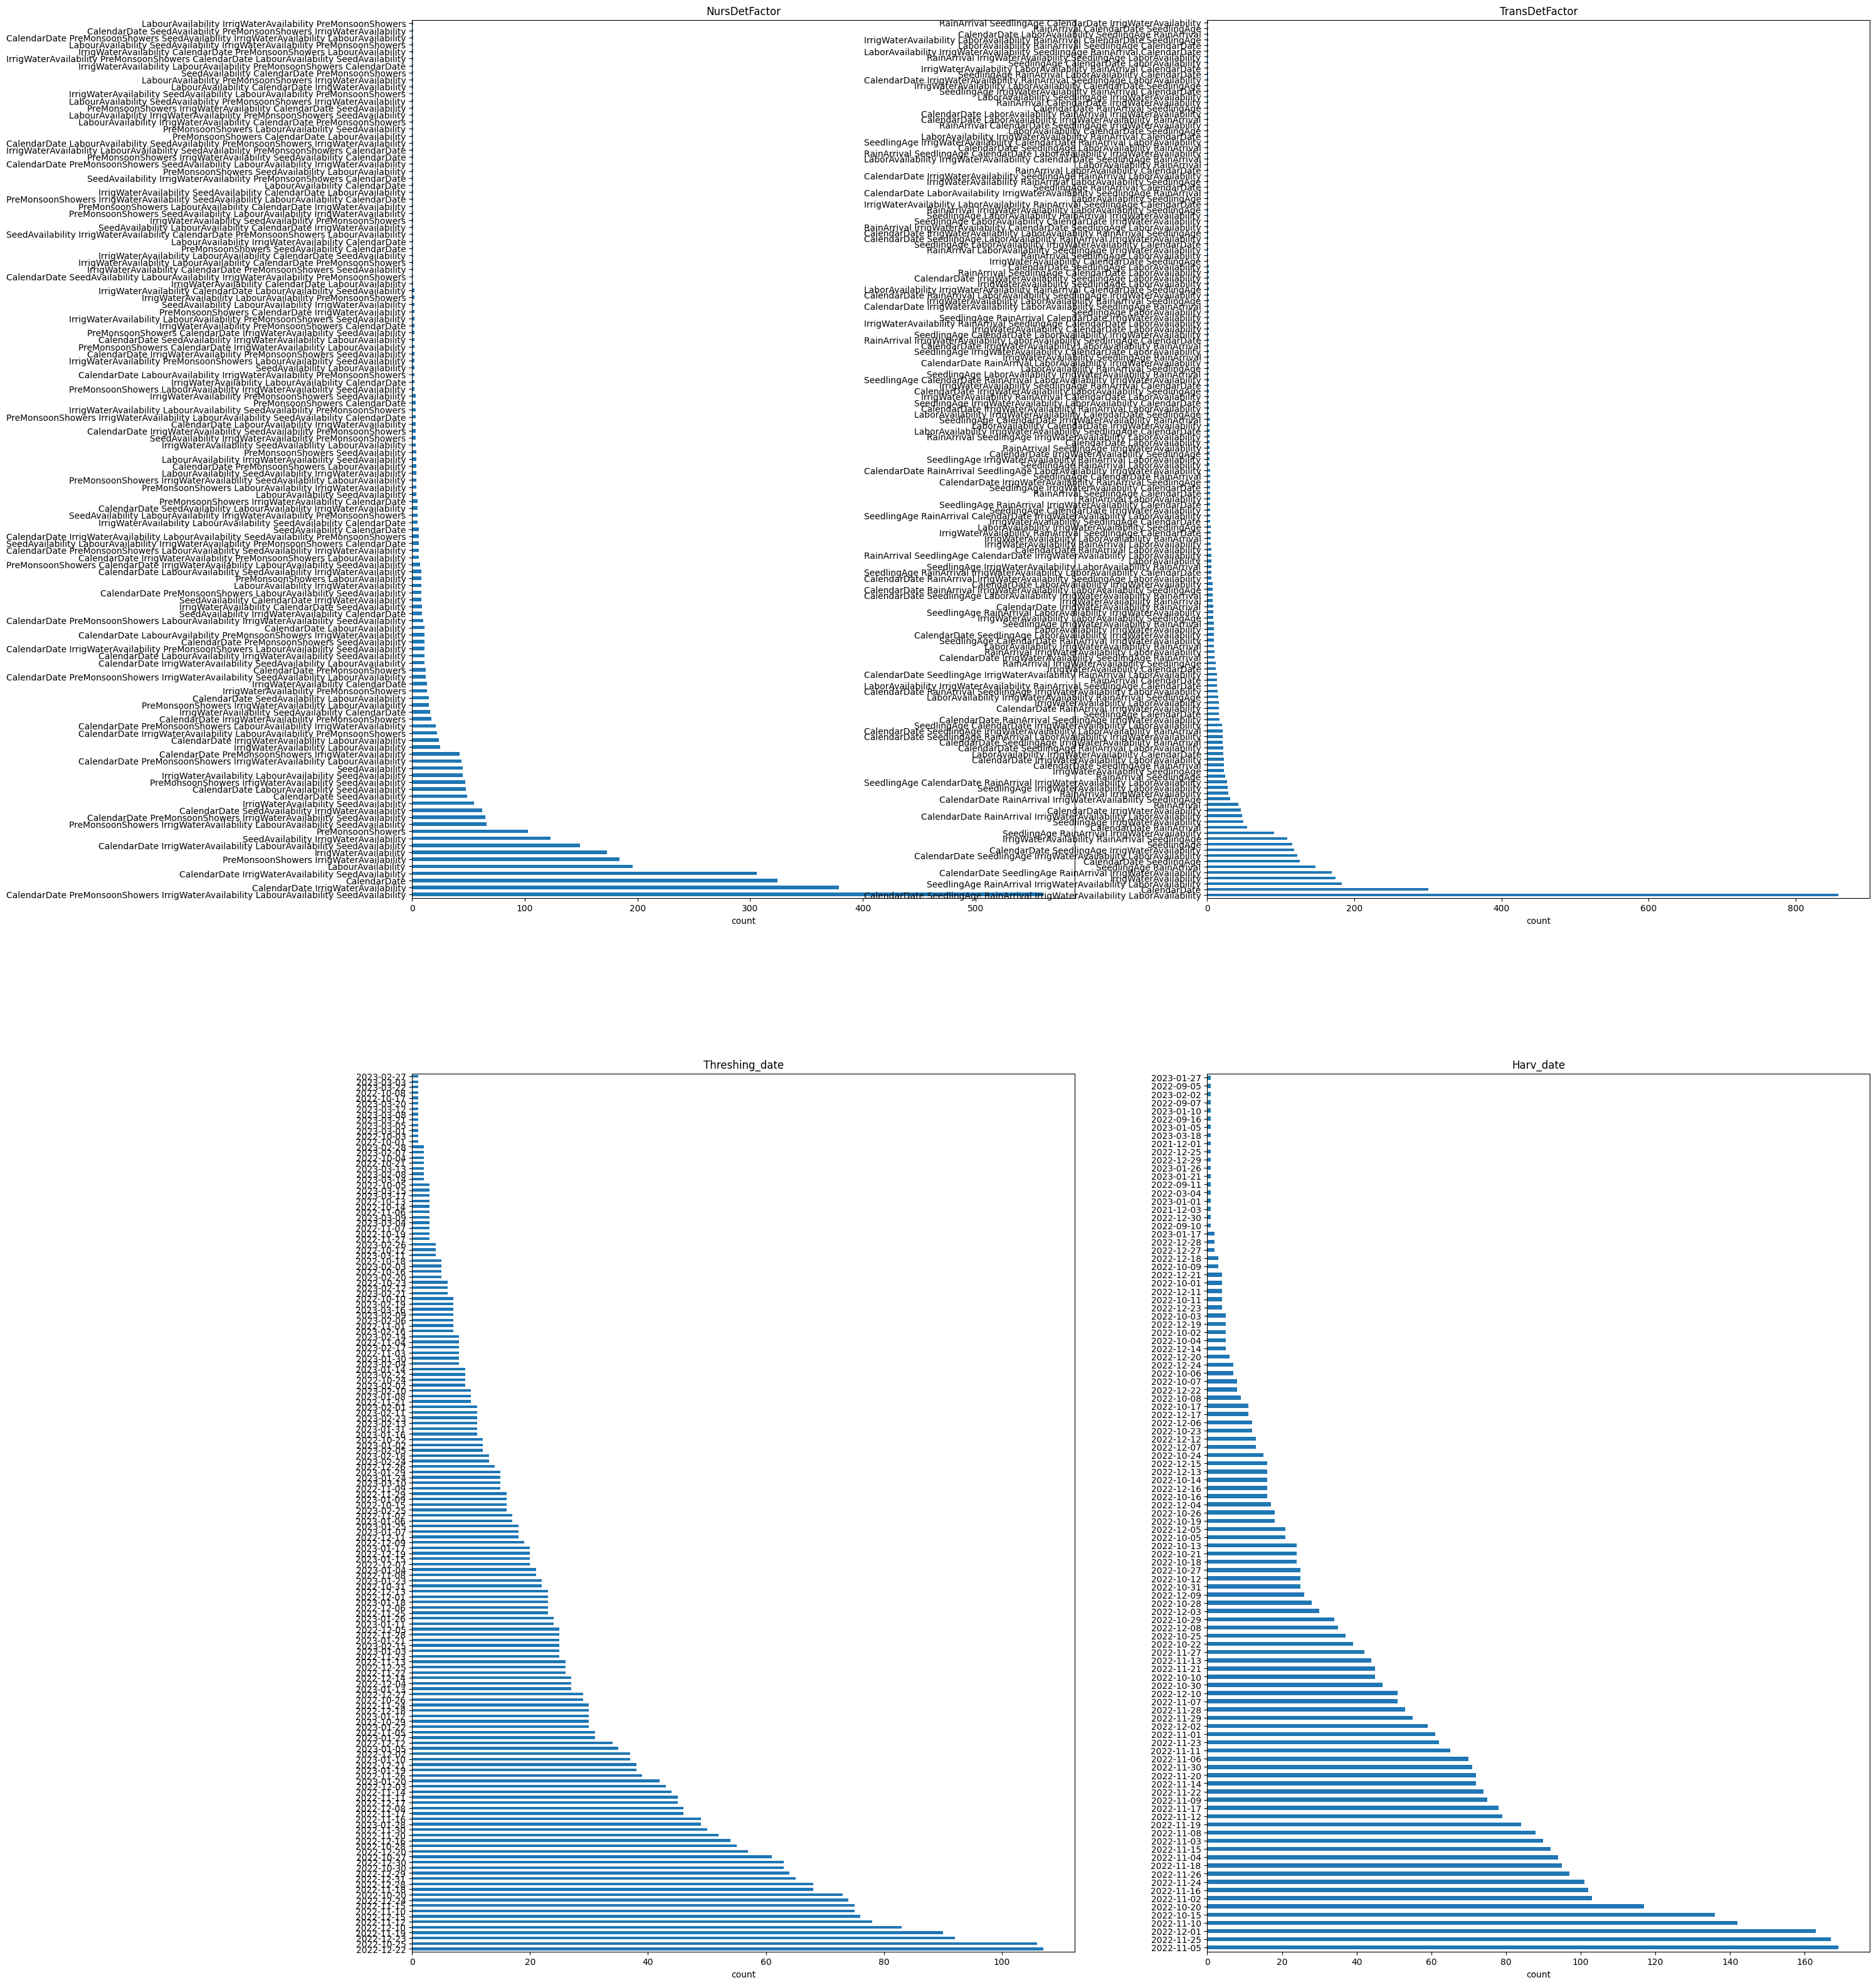

In [ ]:
i=1
plt.figure(figsize=(30,40))
for col in df[["NursDetFactor","TransDetFactor","Threshing_date","Harv_date"]]:
    plt.subplot(2,2,i)
    df[col].value_counts().plot(kind="barh")
    plt.xlabel("count"),
    plt.title(col)
    i += 1
plt.show()

Dans la continuité de notre explication, l'utilisation de termes entre guillemets semble marquer l'association des méthodes employées par les agriculteurs.

Le terme "trandefactor" est un néologisme signifiant "facteur de transformation", utilisé dans le contexte de l'agriculture pour décrire les éléments contribuant à la transformation de l'agriculture traditionnelle en agriculture moderne. D'après le graphe correspondant, on observe que "CalendarDate Seedlingage RainArrival IrrigWaterAvailability Labor Availaity" est le plus fréquemment utilisé, tandis que "RainArrival SeedlingAge CalendarDate IrriWaterAvailability" est le moins utilisé, suggérant peut-être une moindre efficacité.

La variable "Threshing_date" montre une variation importante tout au long de l'année. Cette date de moisson, cruciale pour les agriculteurs, détermine le moment où les cultures sont prêtes à être récoltées. Elle revêt également une importance pour les consommateurs, déterminant quand les produits agricoles seront disponibles sur le marché.

D'autre part, "NursingDetFactor" est un terme agricole désignant un facteur influençant la croissance des semis, pouvant être physique (température, humidité, lumière) ou biologique (nutrition, maladies). D'après le graphe, les facteurs les plus influents sont "CalendarDate PreMonsonShowerirrigAvailability LaboiurAvaibility SeedAvaibility", tandis que "LabourAvaibility IrrigWaterAvalaibity PreMoonsonsShowers" sont les moins influents.

In [ ]:
df.head(2)

ID District      Block  CultLand  CropCultLand  \
0  ID_GTFAC7PEVWQ9  Nalanda  Noorsarai        45            40   
1  ID_TK40ARLSPOKS  Nalanda     Rajgir        26            26   

                               LandPreparationMethod CropTillageDate  \
0               TractorPlough FourWheelTracRotavator      2022-07-20   
1  WetTillagePuddling TractorPlough FourWheelTrac...      2022-07-18   

   CropTillageDepth         CropEstMethod RcNursEstDate  \
0                 5  Manual_PuddledRandom    2022-06-27   
1                 5  Manual_PuddledRandom    2022-06-20   

  SeedingSowingTransplanting  SeedlingsPerPit  \
0                 2022-07-21              2.0   
1                 2022-07-20              2.0   

                                       NursDetFactor  \
0  CalendarDate IrrigWaterAvailability SeedAvaila...   
1  CalendarDate PreMonsoonShowers IrrigWaterAvail...   

                                      TransDetFactor  \
0  CalendarDate SeedlingAge RainArrival IrrigWate...   
1  CalendarDate SeedlingAge RainArrival IrrigWate...   

   TransplantingIrrigationHours TransplantingIrrigationSource  \
0                           5.0                        Boring   
1                           5.0                        Boring   

  TransplantingIrrigationPowerSource  TransIrriCost  StandingWater  \
0                           Electric          200.0            2.0   
1                           Electric          125.0            3.0   

  OrgFertilizers  Ganaura  CropOrgFYM PCropSolidOrgFertAppMethod  \
0            NaN      NaN         NaN                        NaN   
1            NaN      NaN         NaN                        NaN   

   NoFertilizerAppln CropbasalFerts  BasalDAP  BasalUrea MineralFertAppMethod  \
0                  2           Urea       NaN       20.0         Broadcasting   
1                  2       DAP Urea      15.0       10.0         Broadcasting   

  FirstTopDressFert  1tdUrea  1appDaysUrea  2tdUrea  2appDaysUrea  \
0              Urea     15.0          18.0      NaN           NaN   
1              Urea     20.0          39.0      NaN           NaN   

  MineralFertAppMethod.1 Harv_method   Harv_date  Harv_hand_rent  \
0           Broadcasting     machine  2022-11-16             NaN   
1           Broadcasting        hand  2022-11-25             3.0   

  Threshing_date Threshing_method  Residue_length  Residue_perc  \
0     2022-11-16          machine              30            40   
1     2022-12-24          machine              24            10   

      Stubble_use    Acre  Yield  
0  plowed_in_soil  0.3125    600  
1  plowed_in_soil  0.3125    600

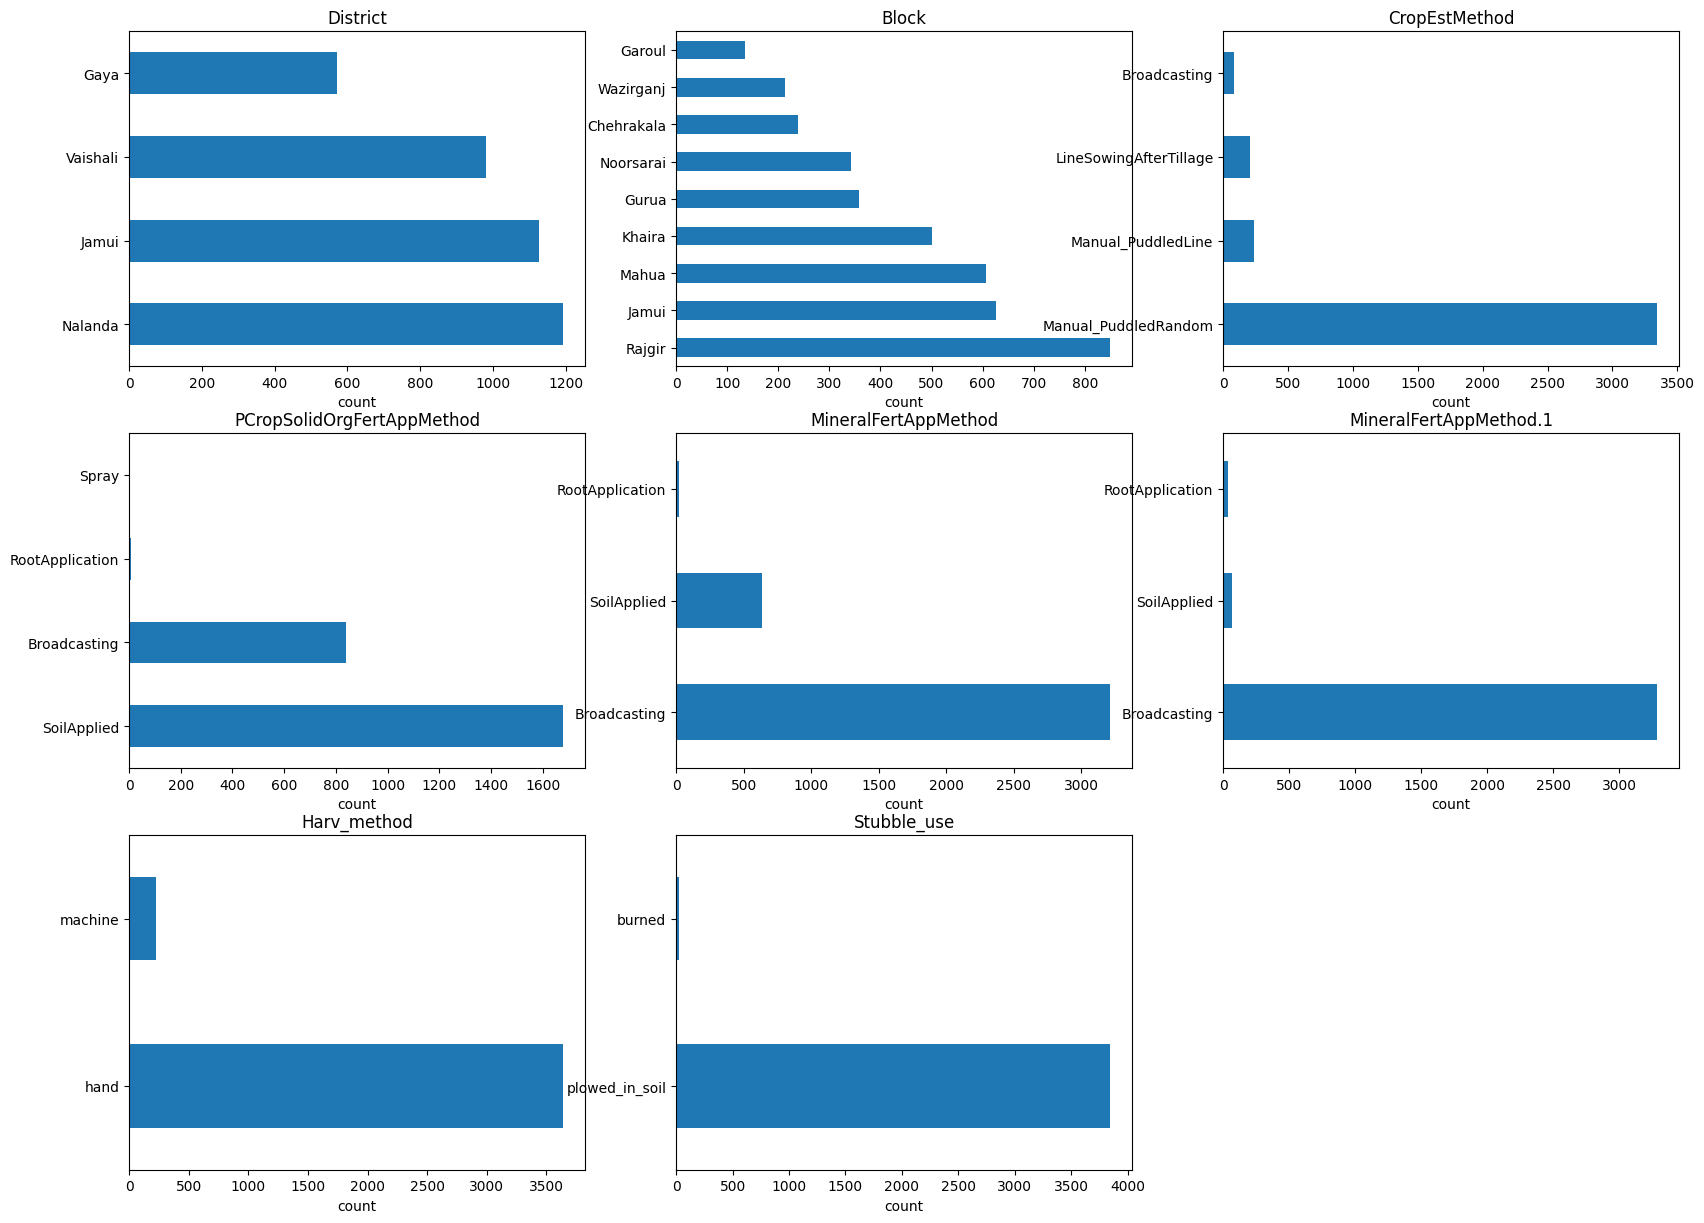

In [ ]:
i=1
plt.figure(figsize=(20,20))
for col in df[["District","Block","CropEstMethod","PCropSolidOrgFertAppMethod","MineralFertAppMethod","MineralFertAppMethod.1","Harv_method","Stubble_use"]]:
    plt.subplot(4,3,i)
    df[col].value_counts().plot(kind="barh")
    plt.xlabel("count")
    plt.title(col)
    i += 1
plt.show()

D'après l'ensemble de ces graphiques, on constate que l'agriculture manuelle est largement prédominante en Inde par rapport à l'agriculture mécanisée. Il y a environ 55% des agriculteurs en Inde et la majorité n'utilisent pas de machines.

La plupart des agriculteurs sont localisés dans les districts de Nalanda et Jamui.

Un faible pourcentage d'agriculteurs pratique la méthode de brûlage des chaumes, qui sont les résidus de tiges et de feuilles laissés sur le sol après la récolte. En revanche, la grande majorité, voire la quasi-totalité, utilise la méthode du "plowed in soil", qui consiste à labourer le sol à l'aide d'une charrue ou d'un autre outil. Cette pratique permet de briser le sol, d'éliminer les mauvaises herbes et de préparer le terrain pour la plantation.

On observe une grande diversité de méthodes utilisées par les agriculteurs, notamment en ce qui concerne l'utilisation d'engrais minéraux, où la méthode de "broadcasting" est très répandue. Cela est probablement dû à son efficacité reconnue pour augmenter le rendement des cultures.

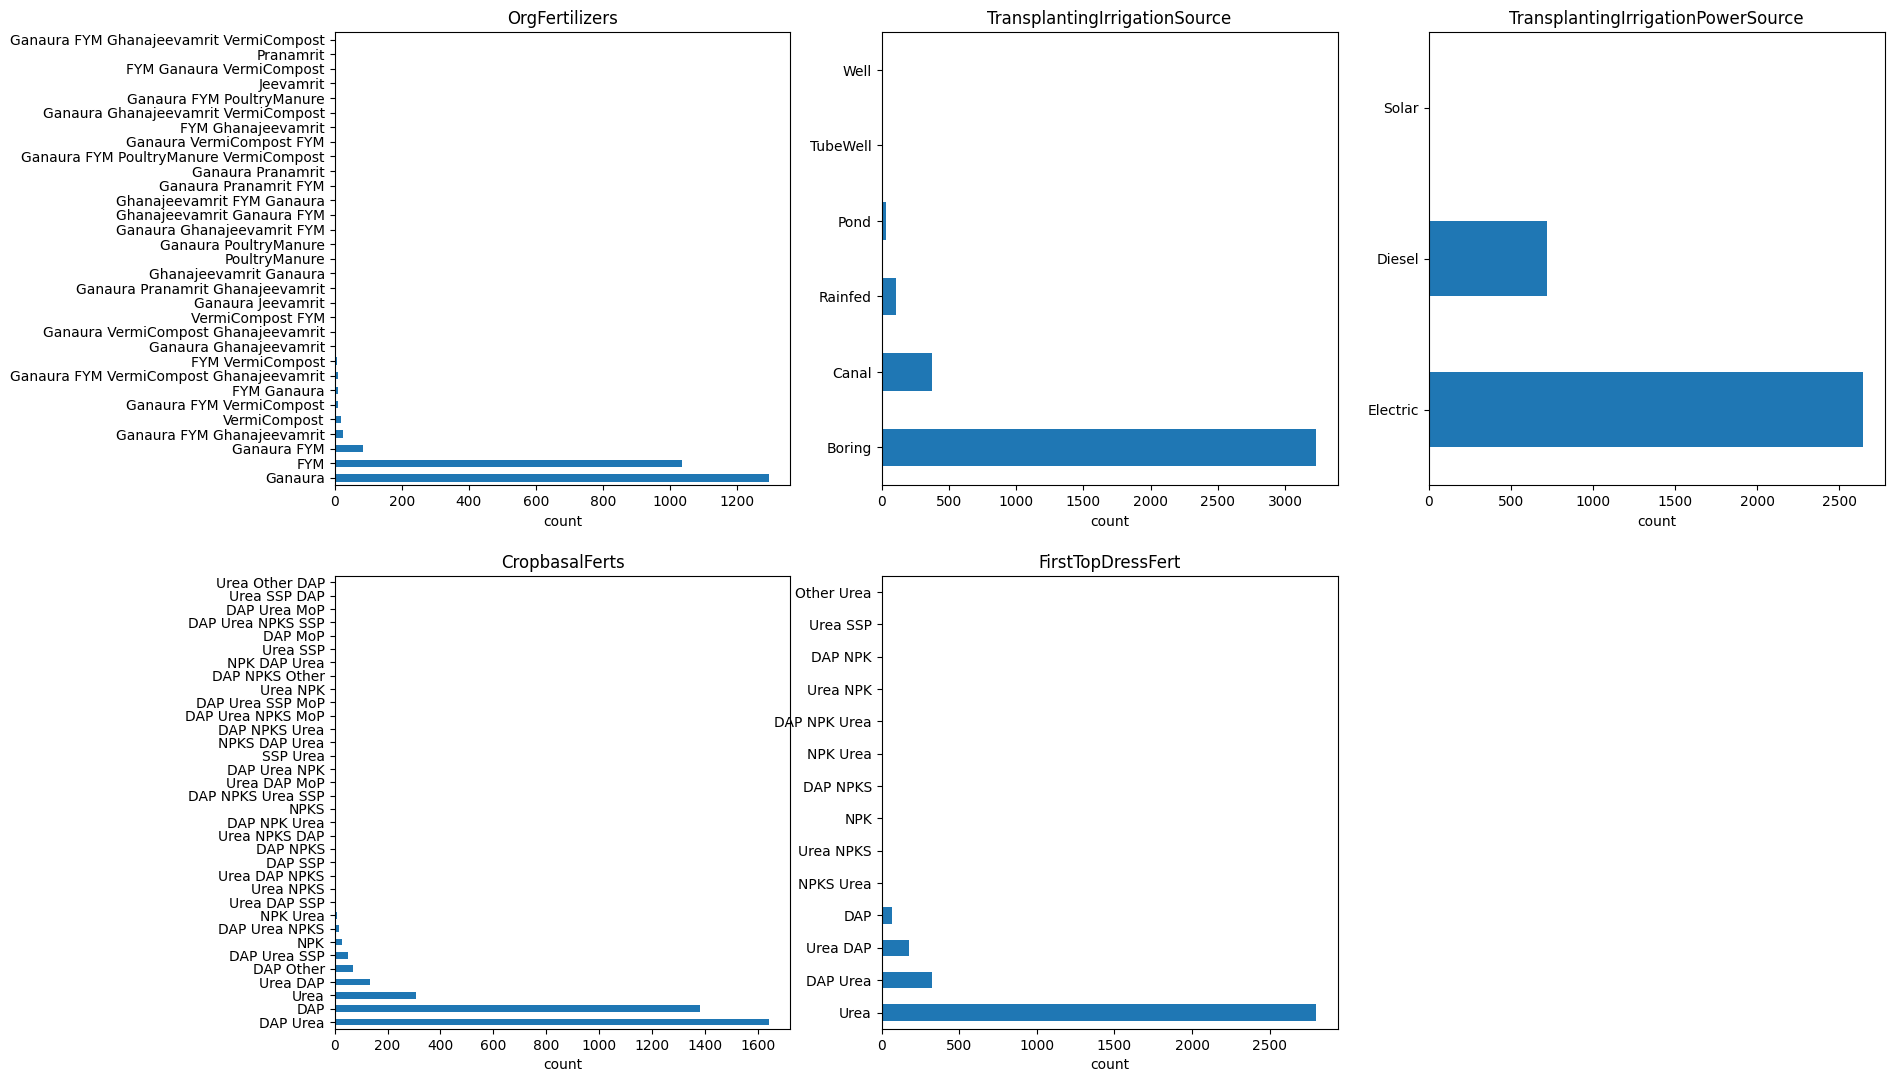

In [ ]:
i=1
plt.figure(figsize=(20,20))
for col in df[["OrgFertilizers","TransplantingIrrigationSource","TransplantingIrrigationPowerSource","CropbasalFerts","FirstTopDressFert"]]:
    plt.subplot(3,3,i)
    df[col].value_counts().plot(kind="barh")
    plt.xlabel("count")
    plt.title(col)
    i += 1
plt.show()

En ce qui concerne "TransplantingIrrigationSource", désignant la source d'irrigation pour le repiquage, la plupart des agriculteurs utilisent la technique du "boring", c'est-à-dire le forage, qui consiste à créer un trou dans le sol à l'aide d'une tarière ou d'une perceuse. Les puits sont les moins utilisés comme source d'irrigation, probablement en raison de leur difficulté d'utilisation et de leur limitation temporelle.

Quant à "TransplantingIrrigationPowerSource", indiquant la source d'énergie pour l'irrigation du repiquage, l'électricité est la plus fréquemment utilisée, tandis que l'utilisation de panneaux solaires semble moins répandue malgré ses avantages pratiques.

En outre, on peut déduire que l'engrais le plus utilisé est le "ganaura".

Les engrais DAP, Urea et DAP (Di-ammonium Phosphate) sont les plus utilisés dans la catégorie "Cropbasalferts", représentant les engrais de fond pour les cultures.

Dans la catégorie "FirstTopDressFert" ou "première fertilisation de surface", les engrais Urea (Urea ou Carbonyl Diamide) sont les plus couramment utilisés.

Ayant exploré l'ensemble des données, nous allons maintenant examiner leur relation avec la variable cible.

#### Relation entre target et variables

##### Relation entre les variables quantitatives( variables cibles inclus):

Certes, explorons ensemble la corrélation entre les variables numériques et la variable cible, ainsi que les relations entre chaque paire de variables quantitatives. Cela nous permettra de mieux comprendre les influences mutuelles et d'identifier des tendances significatives dans nos données.

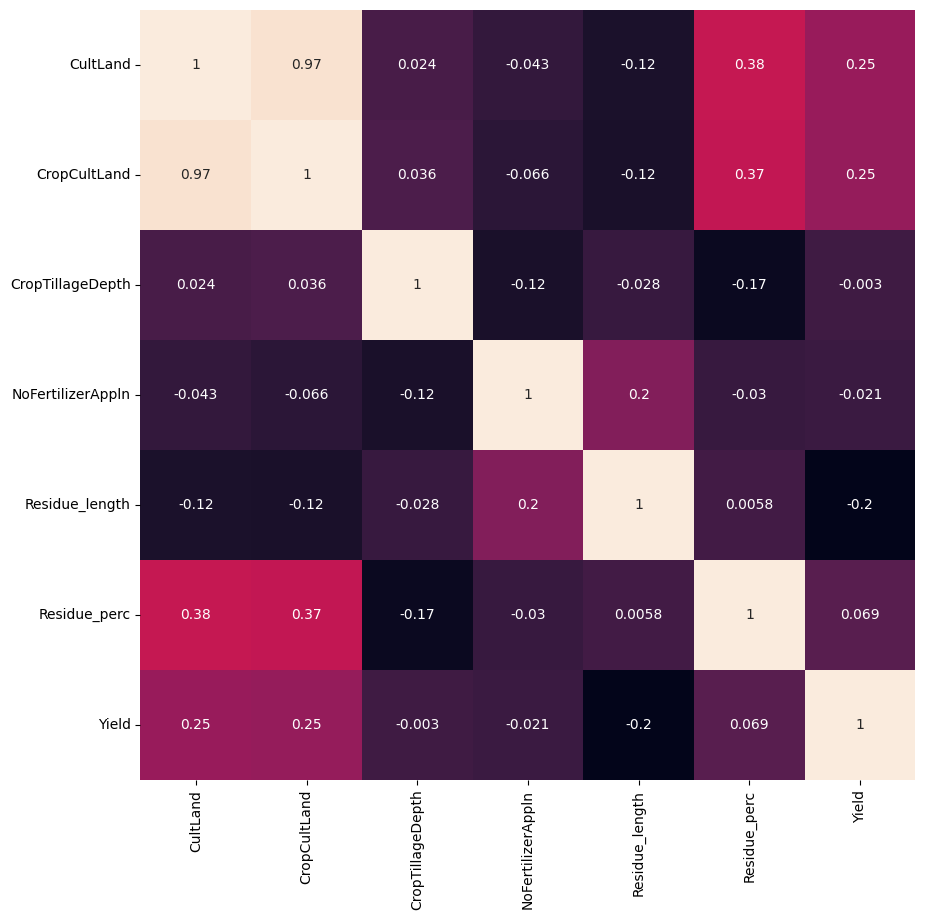

In [ ]:
plt.figure(figsize=(10,10))
correlation=df.select_dtypes('int').corr()
sns.heatmap(correlation, annot=True,cbar=False)
plt.show()

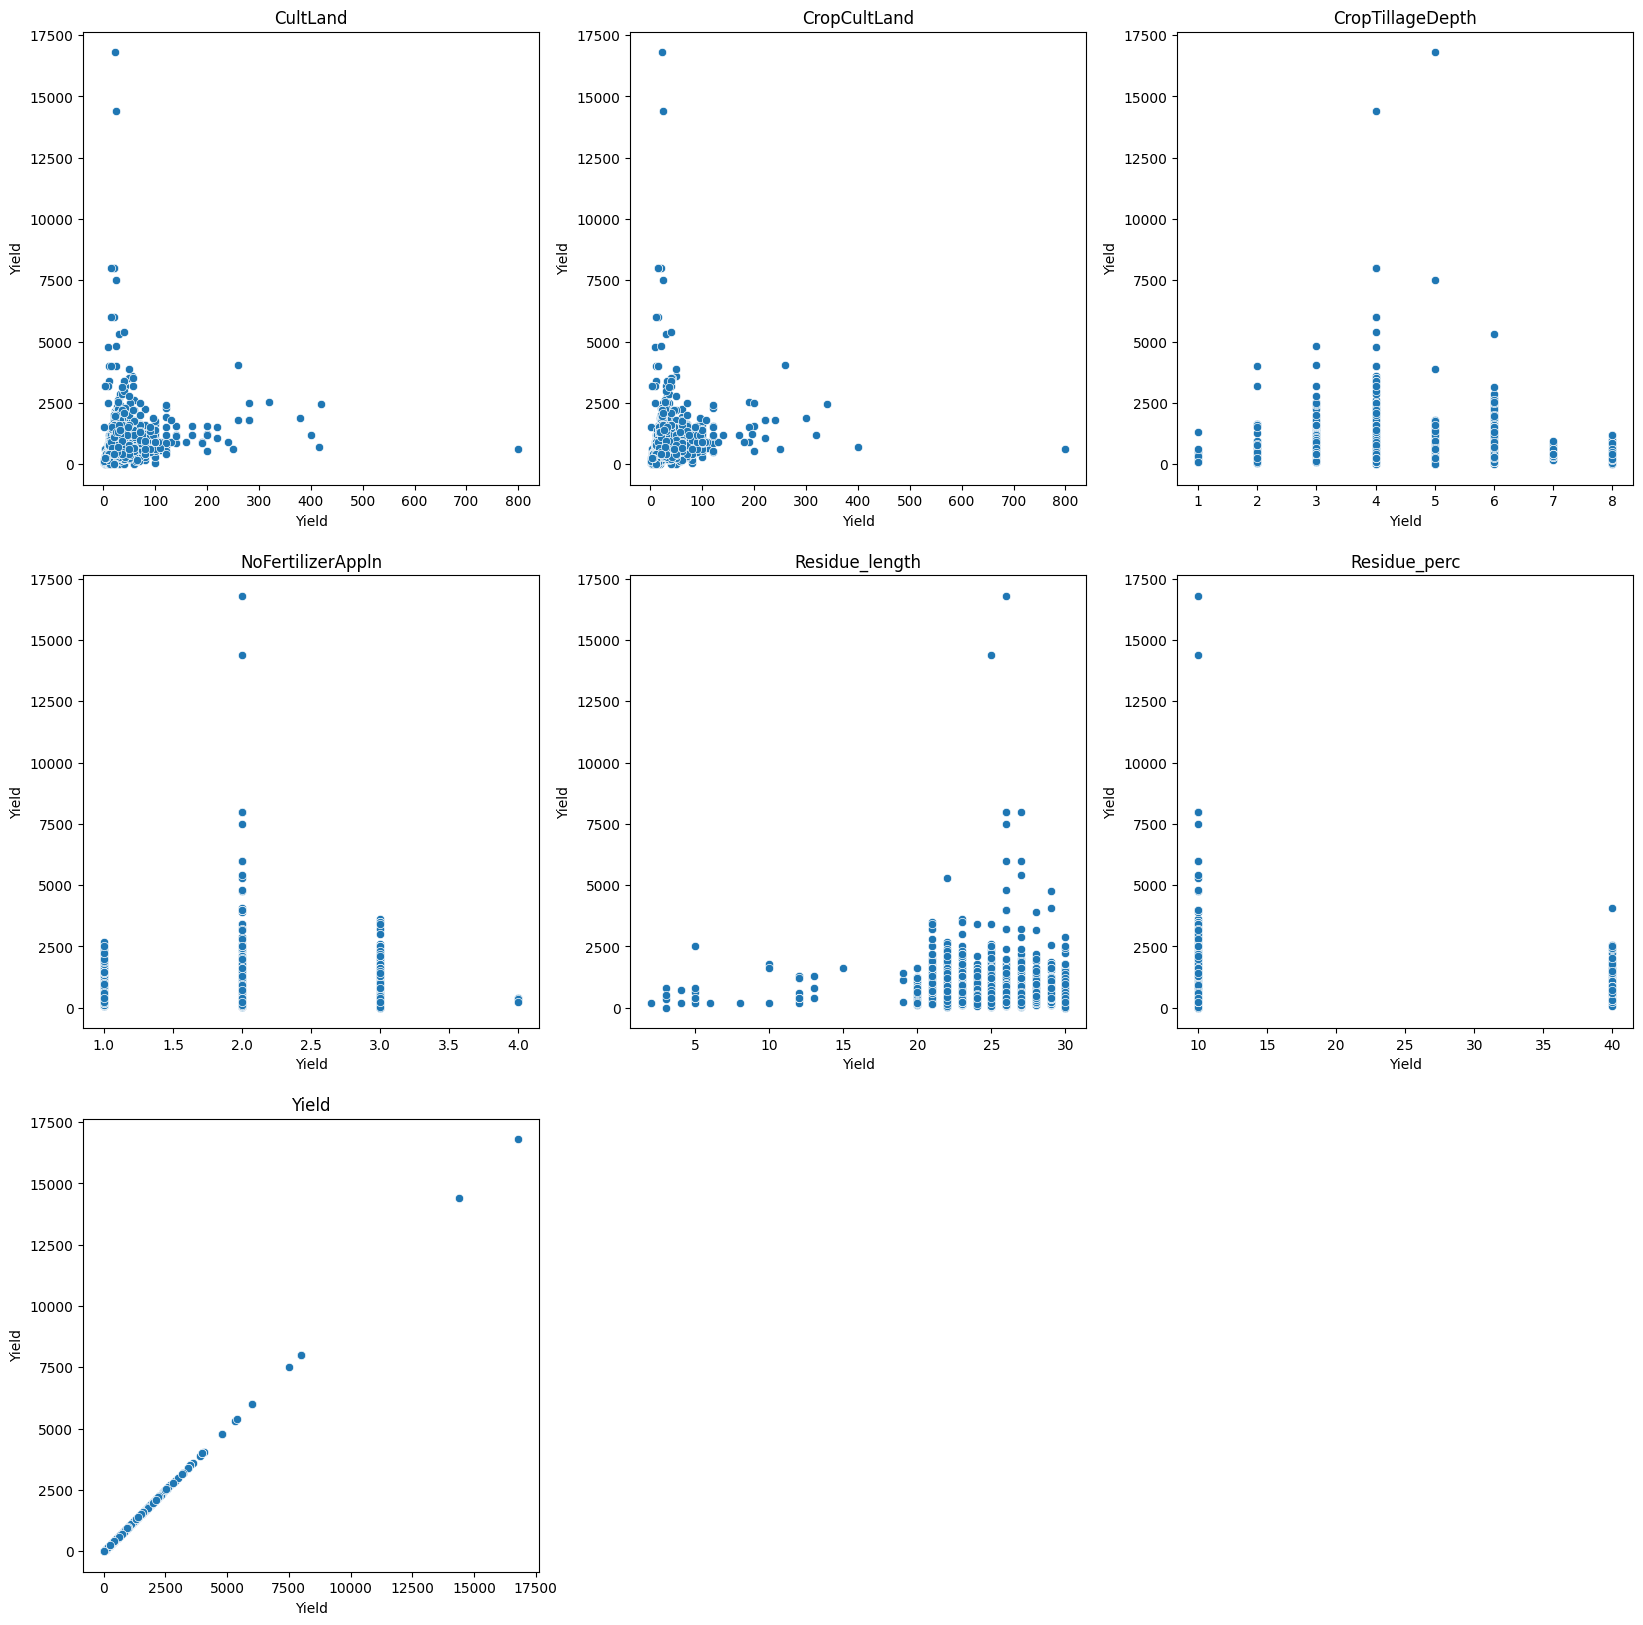

In [ ]:
i=1
plt.figure(figsize=(20,20))

for col in df.select_dtypes('int'):
    plt.subplot(3,3,i)
    sns.scatterplot(data=df, x=col, y="Yield")
    plt.xlabel("Yield")
    plt.title(col)
    i += 1
plt.show()


D'après ce graphique, on peut conclure que "Cutland", "CropCutLand", et "Yield" sont positivement corrélées, ce qui indique que les cultures cultivées sur une superficie plus grande ont tendance à avoir un rendement plus élevé.

En revanche, "NoFertilizerAppln", "CropTillageDepth", et "Residue_length" présentent une corrélation négative avec "Yield", suggérant que les cultures labourées ou celles avec une longueur de résidus plus courte ont tendance à avoir un rendement plus faible.

En outre, "Residue_length" est positivement corrélée avec "Yield", suggérant que les cultures avec des résidus de culture plus longs ont tendance à avoir un rendement plus élevé. Ces observations fournissent des indications importantes sur les facteurs qui influent sur le rendement des cultures dans notre ensemble de données.

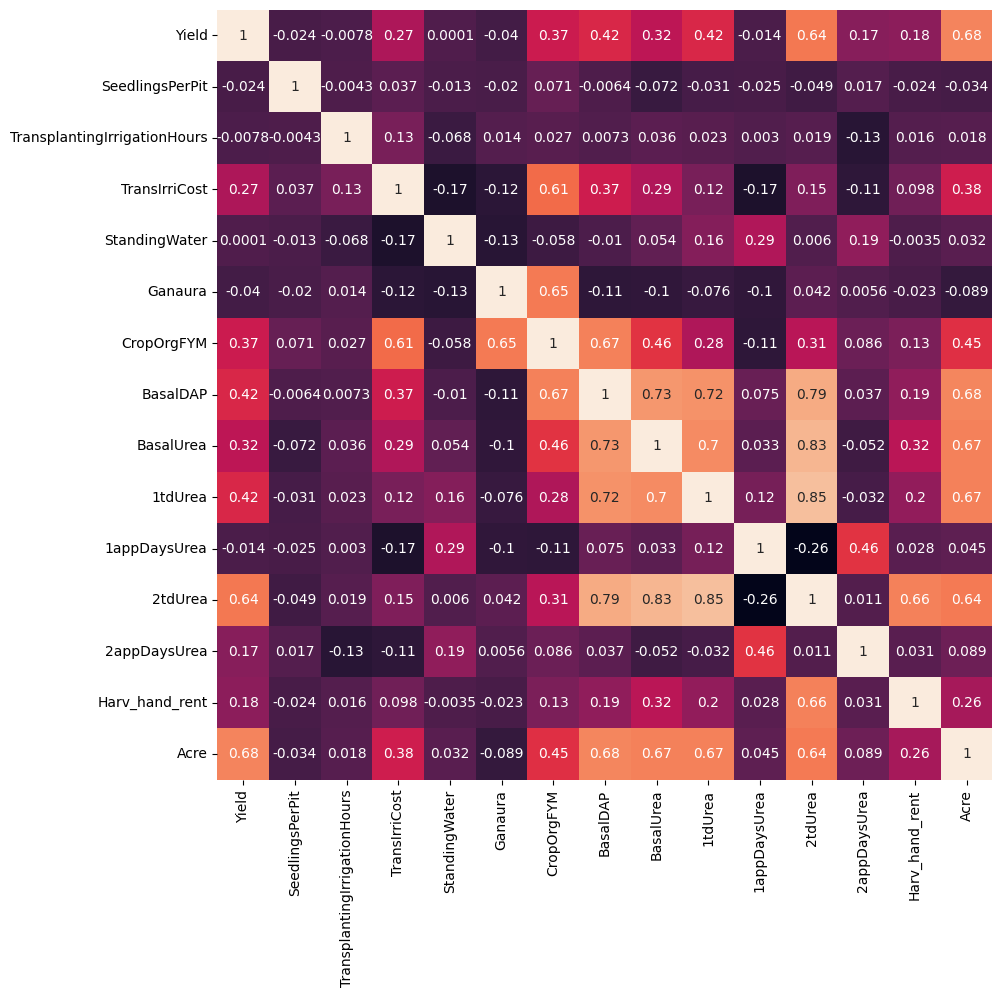

In [ ]:
plt.figure(figsize=(10,10))
correlation=df.select_dtypes('float')
correlation.insert(0, "Yield", df["Yield"])
correlation = correlation.corr()
sns.heatmap(correlation, annot=True,cbar=False)
plt.show()

On remarque une relation négative et très négligable avec "SeedlingsPerPit", "TransplantingIrrigationHours","Ganaura", mais positive mais très négligable avec "StandingWater" cela peut être causé par la présence des outliers le mieux c'est d'analyser tous cela graphiquement .

In [ ]:
for col in df.select_dtypes('float'):
    print(col)

SeedlingsPerPit
TransplantingIrrigationHours
TransIrriCost
StandingWater
Ganaura
CropOrgFYM
BasalDAP
BasalUrea
1tdUrea
1appDaysUrea
2tdUrea
2appDaysUrea
Harv_hand_rent
Acre


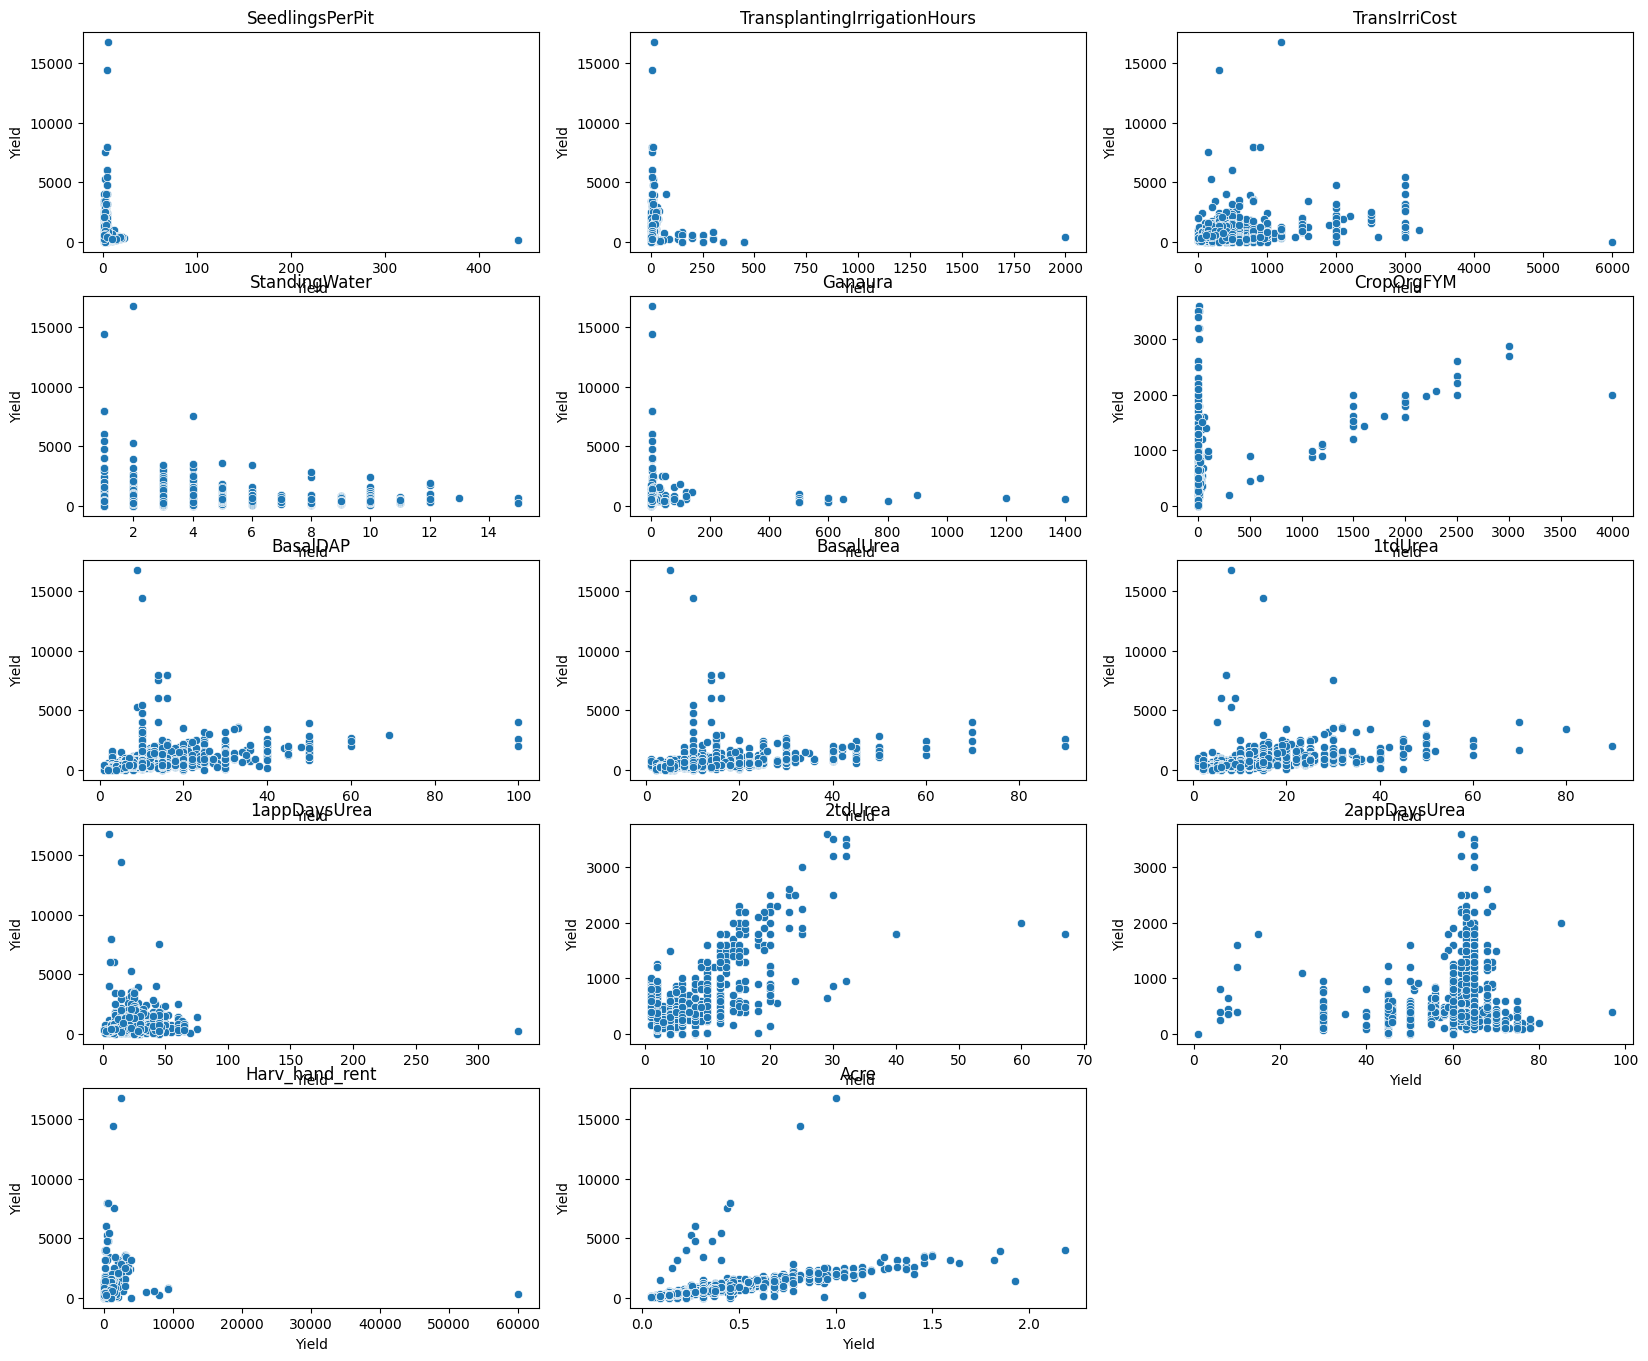

In [ ]:
i=1
plt.figure(figsize=(20,20))

for col in df.select_dtypes('float'):
    plt.subplot(6,3,i)
    sns.scatterplot(data=df, x=col, y="Yield")
    plt.xlabel("Yield")
    plt.title(col)
    i += 1
plt.show()

Les graphiques révèle que le rendement du riz tend à être plus élevé lorsque la profondeur du labour est moins importante. En effet, un labour profond peut perturber le sol et endommager les racines des plants de riz, entraînant ainsi une diminution du rendement.

Il est également notable que la relation entre le rendement et la profondeur du labour n'est pas linéaire. On observe une diminution plus significative du rendement lorsque la profondeur du labour augmente de 0 à 10 cm. Au-delà de 10 cm, la baisse du rendement devient plus graduelle.

En conclusion, ce graphique souligne l'importance de choisir une profondeur de labour appropriée pour maximiser le rendement du riz. Une profondeur de labour de 0 à 10 cm est généralement considérée comme optimale.

##### Relation entre variables cibles et les variables quanlitative:

Puisqu'on a de nombreux variables quantitatives alors on vas les diviser selon des groupes qui peuvent être associer pour de meilleur visualisation.


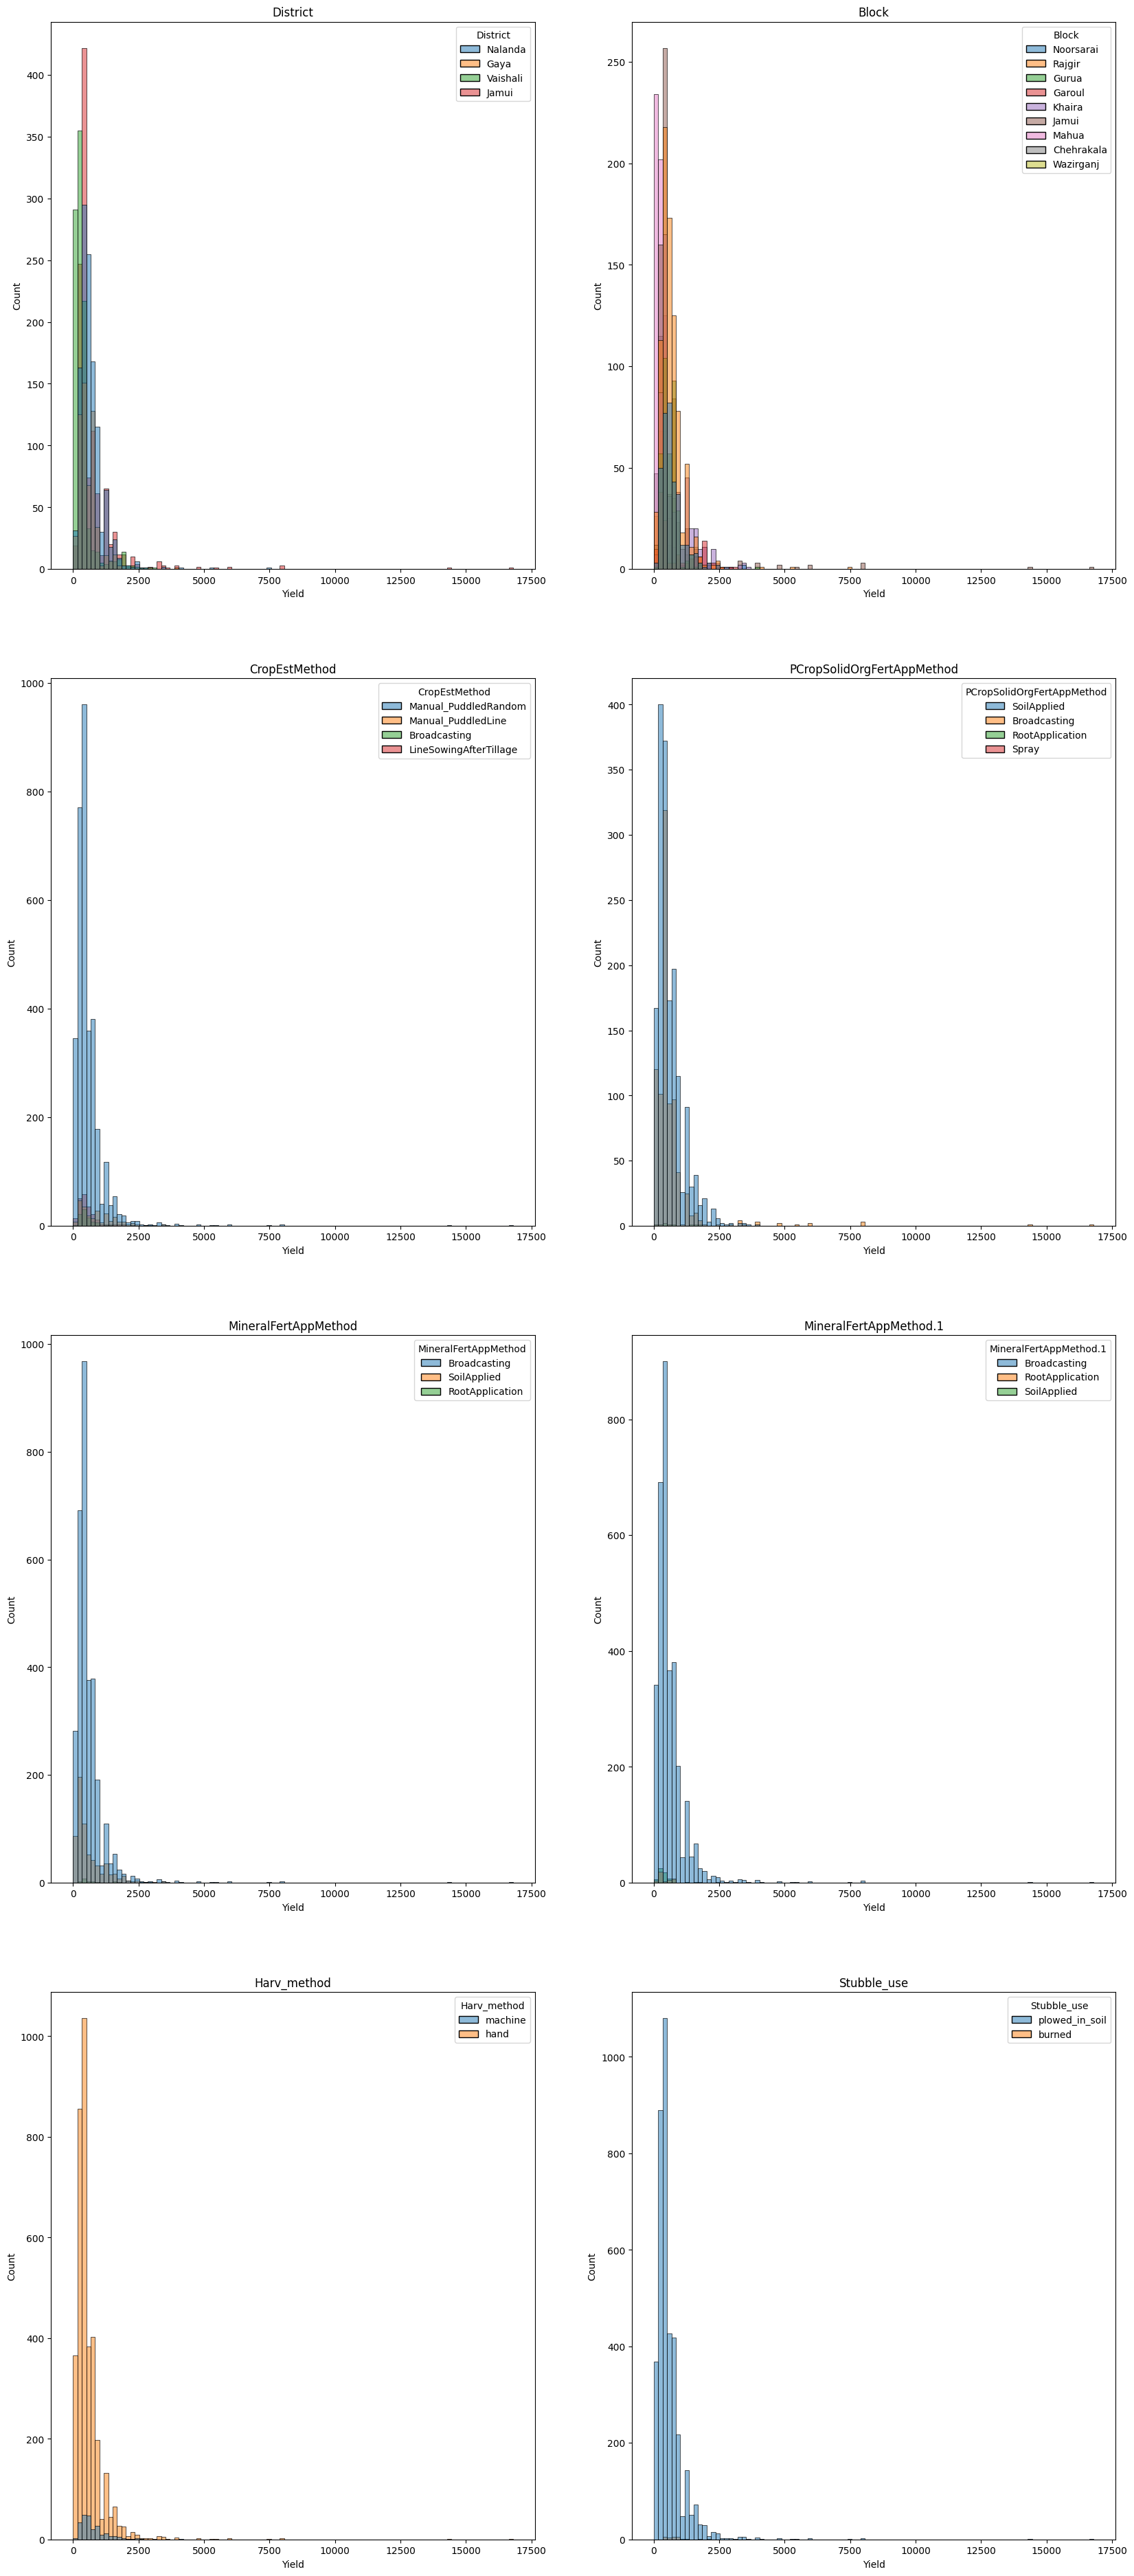

In [ ]:
i=1
plt.figure(figsize=(20,60))
for col in df[["District","Block","CropEstMethod","PCropSolidOrgFertAppMethod","MineralFertAppMethod","MineralFertAppMethod.1","Harv_method","Stubble_use"]]:
    plt.subplot(5,2,i)
    sns.histplot(x='Yield',hue=col,data=df, bins=100)
    plt.xlabel("Yield")
    plt.title(col)
    i += 1
plt.show()

On observe que dans le cas de "CropEstMethod", la méthode "Manual_PuddleRandom" semble avoir un impact plus favorable sur le rendement. De même, pour "PCCropSolidOrgfertAppMethod", la méthode "SoilApplied" montre de meilleurs résultats. En ce qui concerne "MineralFertAppMethod", c'est la méthode "Broadcasting" qui semble être plus efficace.







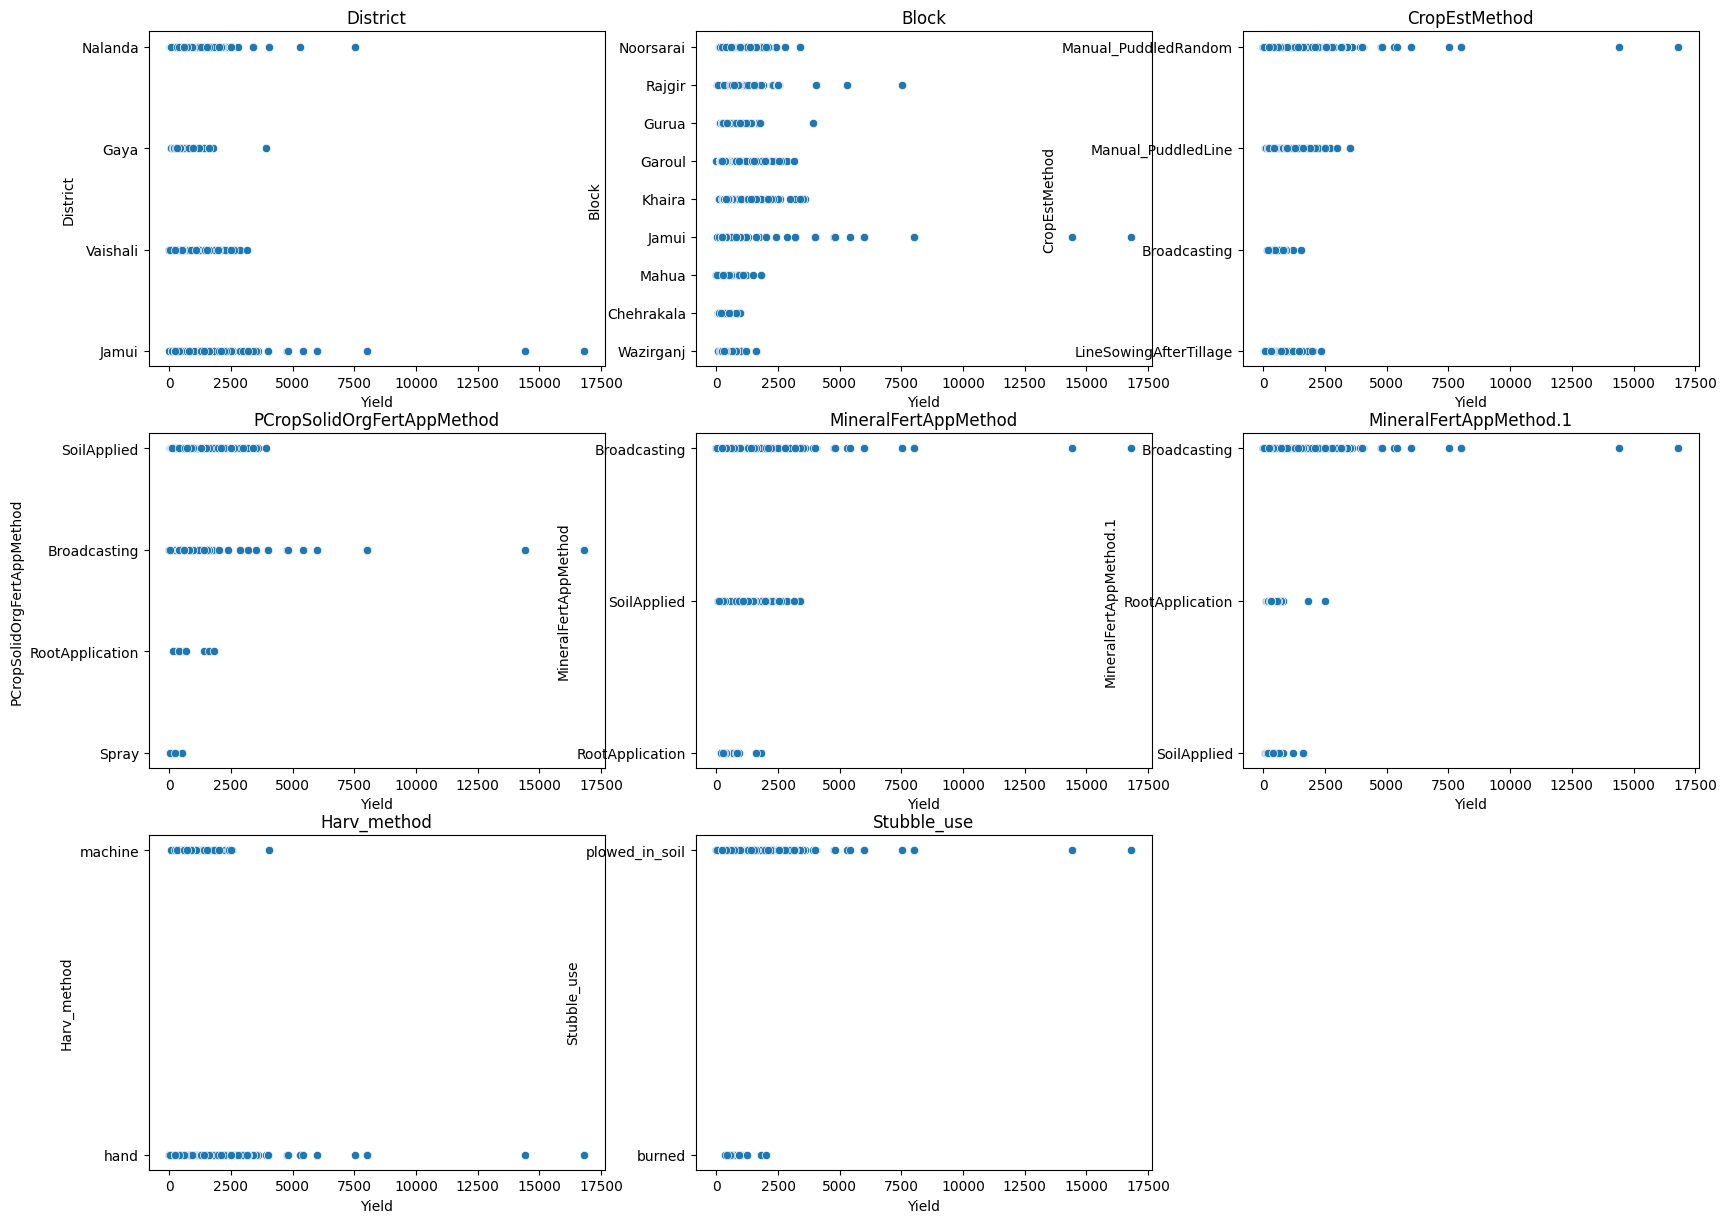

In [ ]:
i=1
plt.figure(figsize=(20,20))
cols=df[["District","Block","CropEstMethod","PCropSolidOrgFertAppMethod","MineralFertAppMethod","MineralFertAppMethod.1","Harv_method","Stubble_use"]]
for col in cols:
    plt.subplot(4,3,i)
    sns.scatterplot(x=df['Yield'],y=col,data=cols)
    plt.xlabel("Yield")
    plt.title(col)
    i += 1
plt.show()

On ne remarque pas de valeurs aberrantes significatives dans les graphiques, à l'exception de celle de "Jamui" dans la colonne du district et de "stubble_use" dans la catégorie "plowed_in_soil".







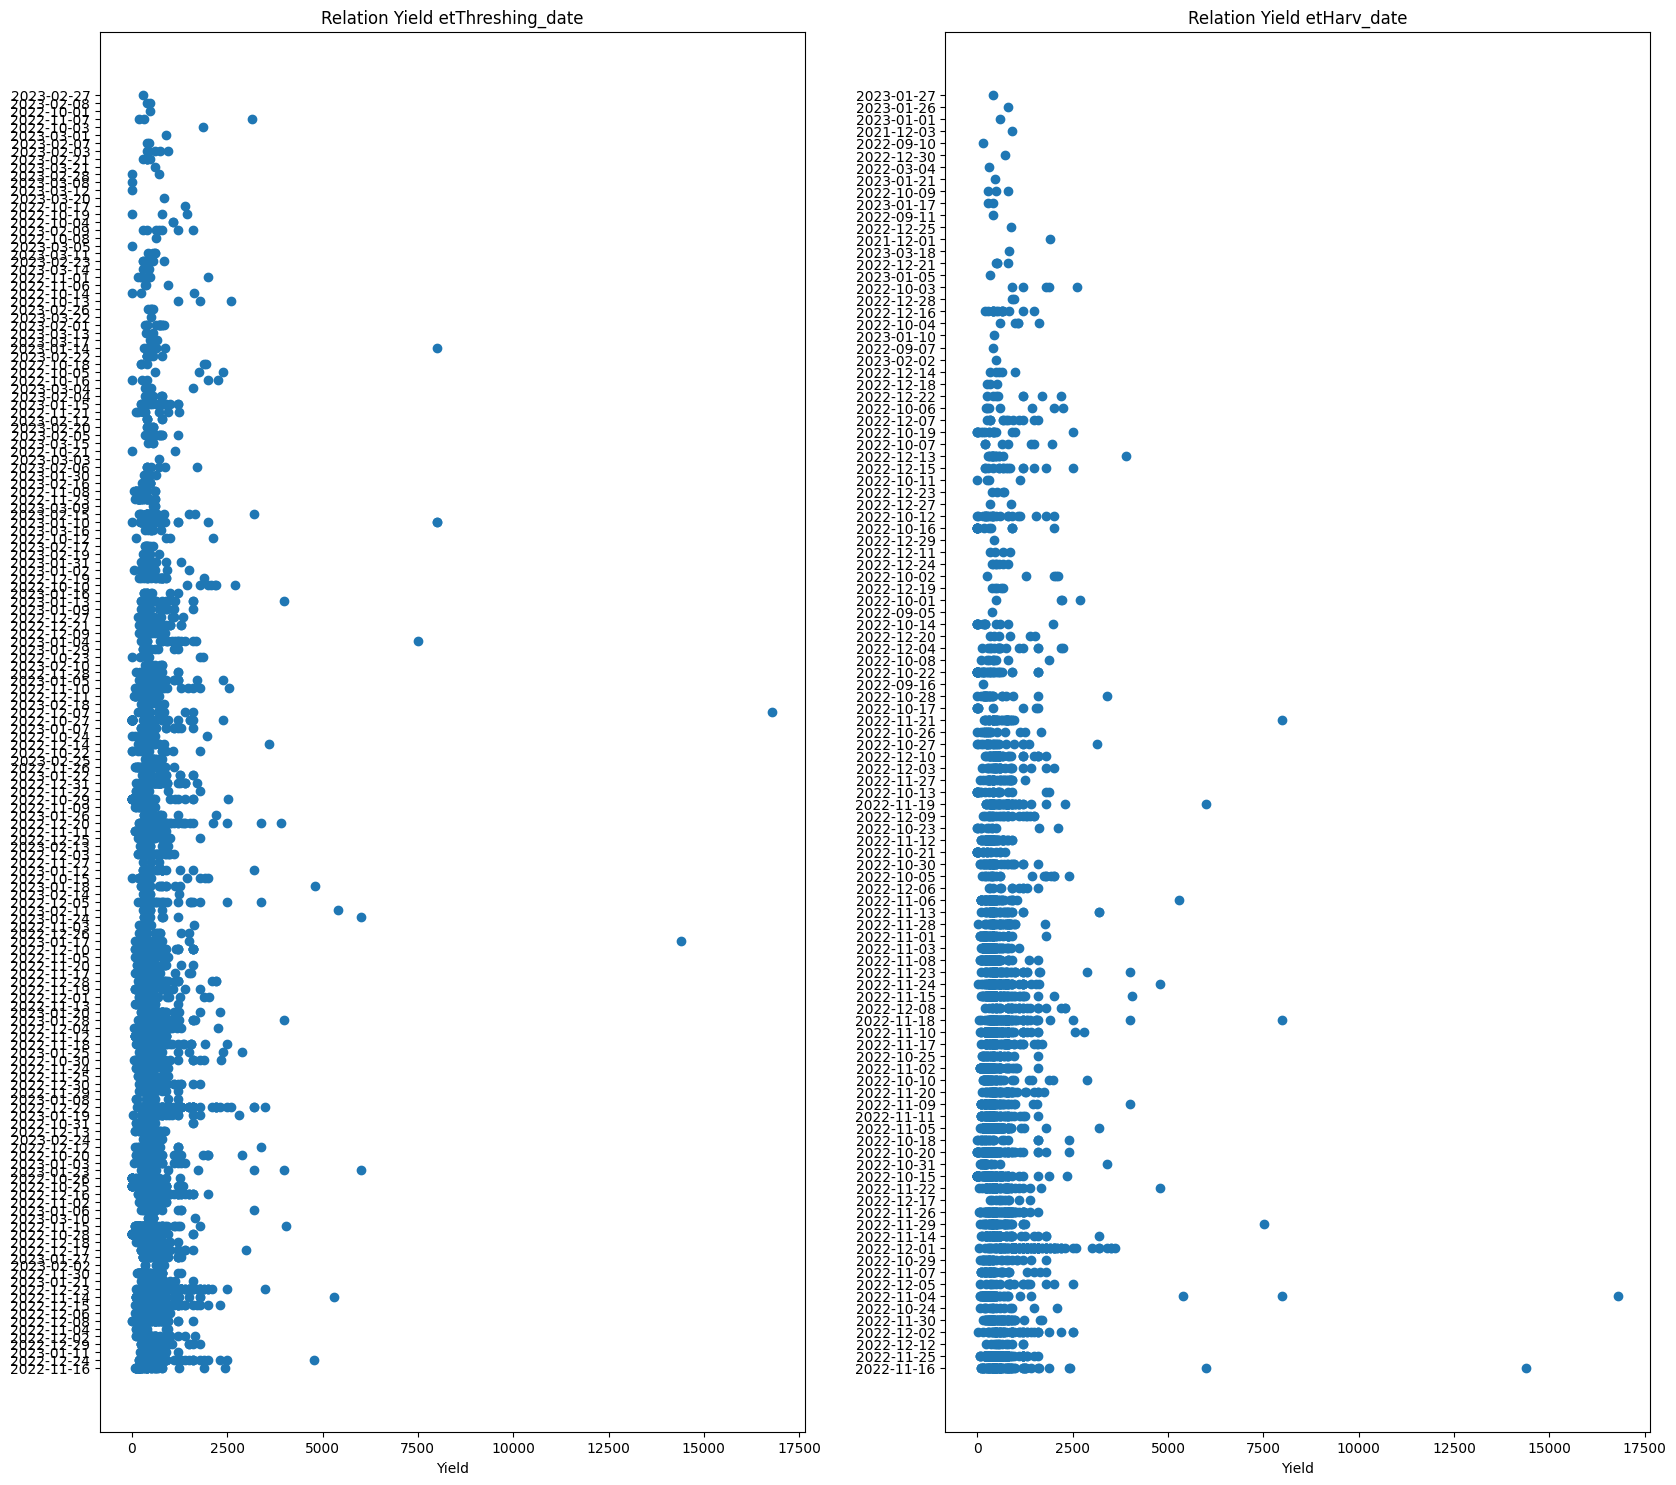

In [ ]:
i=1
plt.figure(figsize=(20,40))
for col in df[["Threshing_date","Harv_date"]]:
    plt.subplot(2,2,i)
    plt.scatter(df['Yield'], df[col])
    plt.xlabel("Yield")
    plt.title(f'Relation Yield et{col}')
    i += 1
plt.show()

On ne semble pas observer de valeurs aberrantes significatives dans la colonne "Threshing_date". Cependant, il est à noter qu'il y a quelques outliers à prendre en considération dans la colonne "harv_date".







In [ ]:
df["SeedingSowingTransplanting"].dtypes

dtype('O')

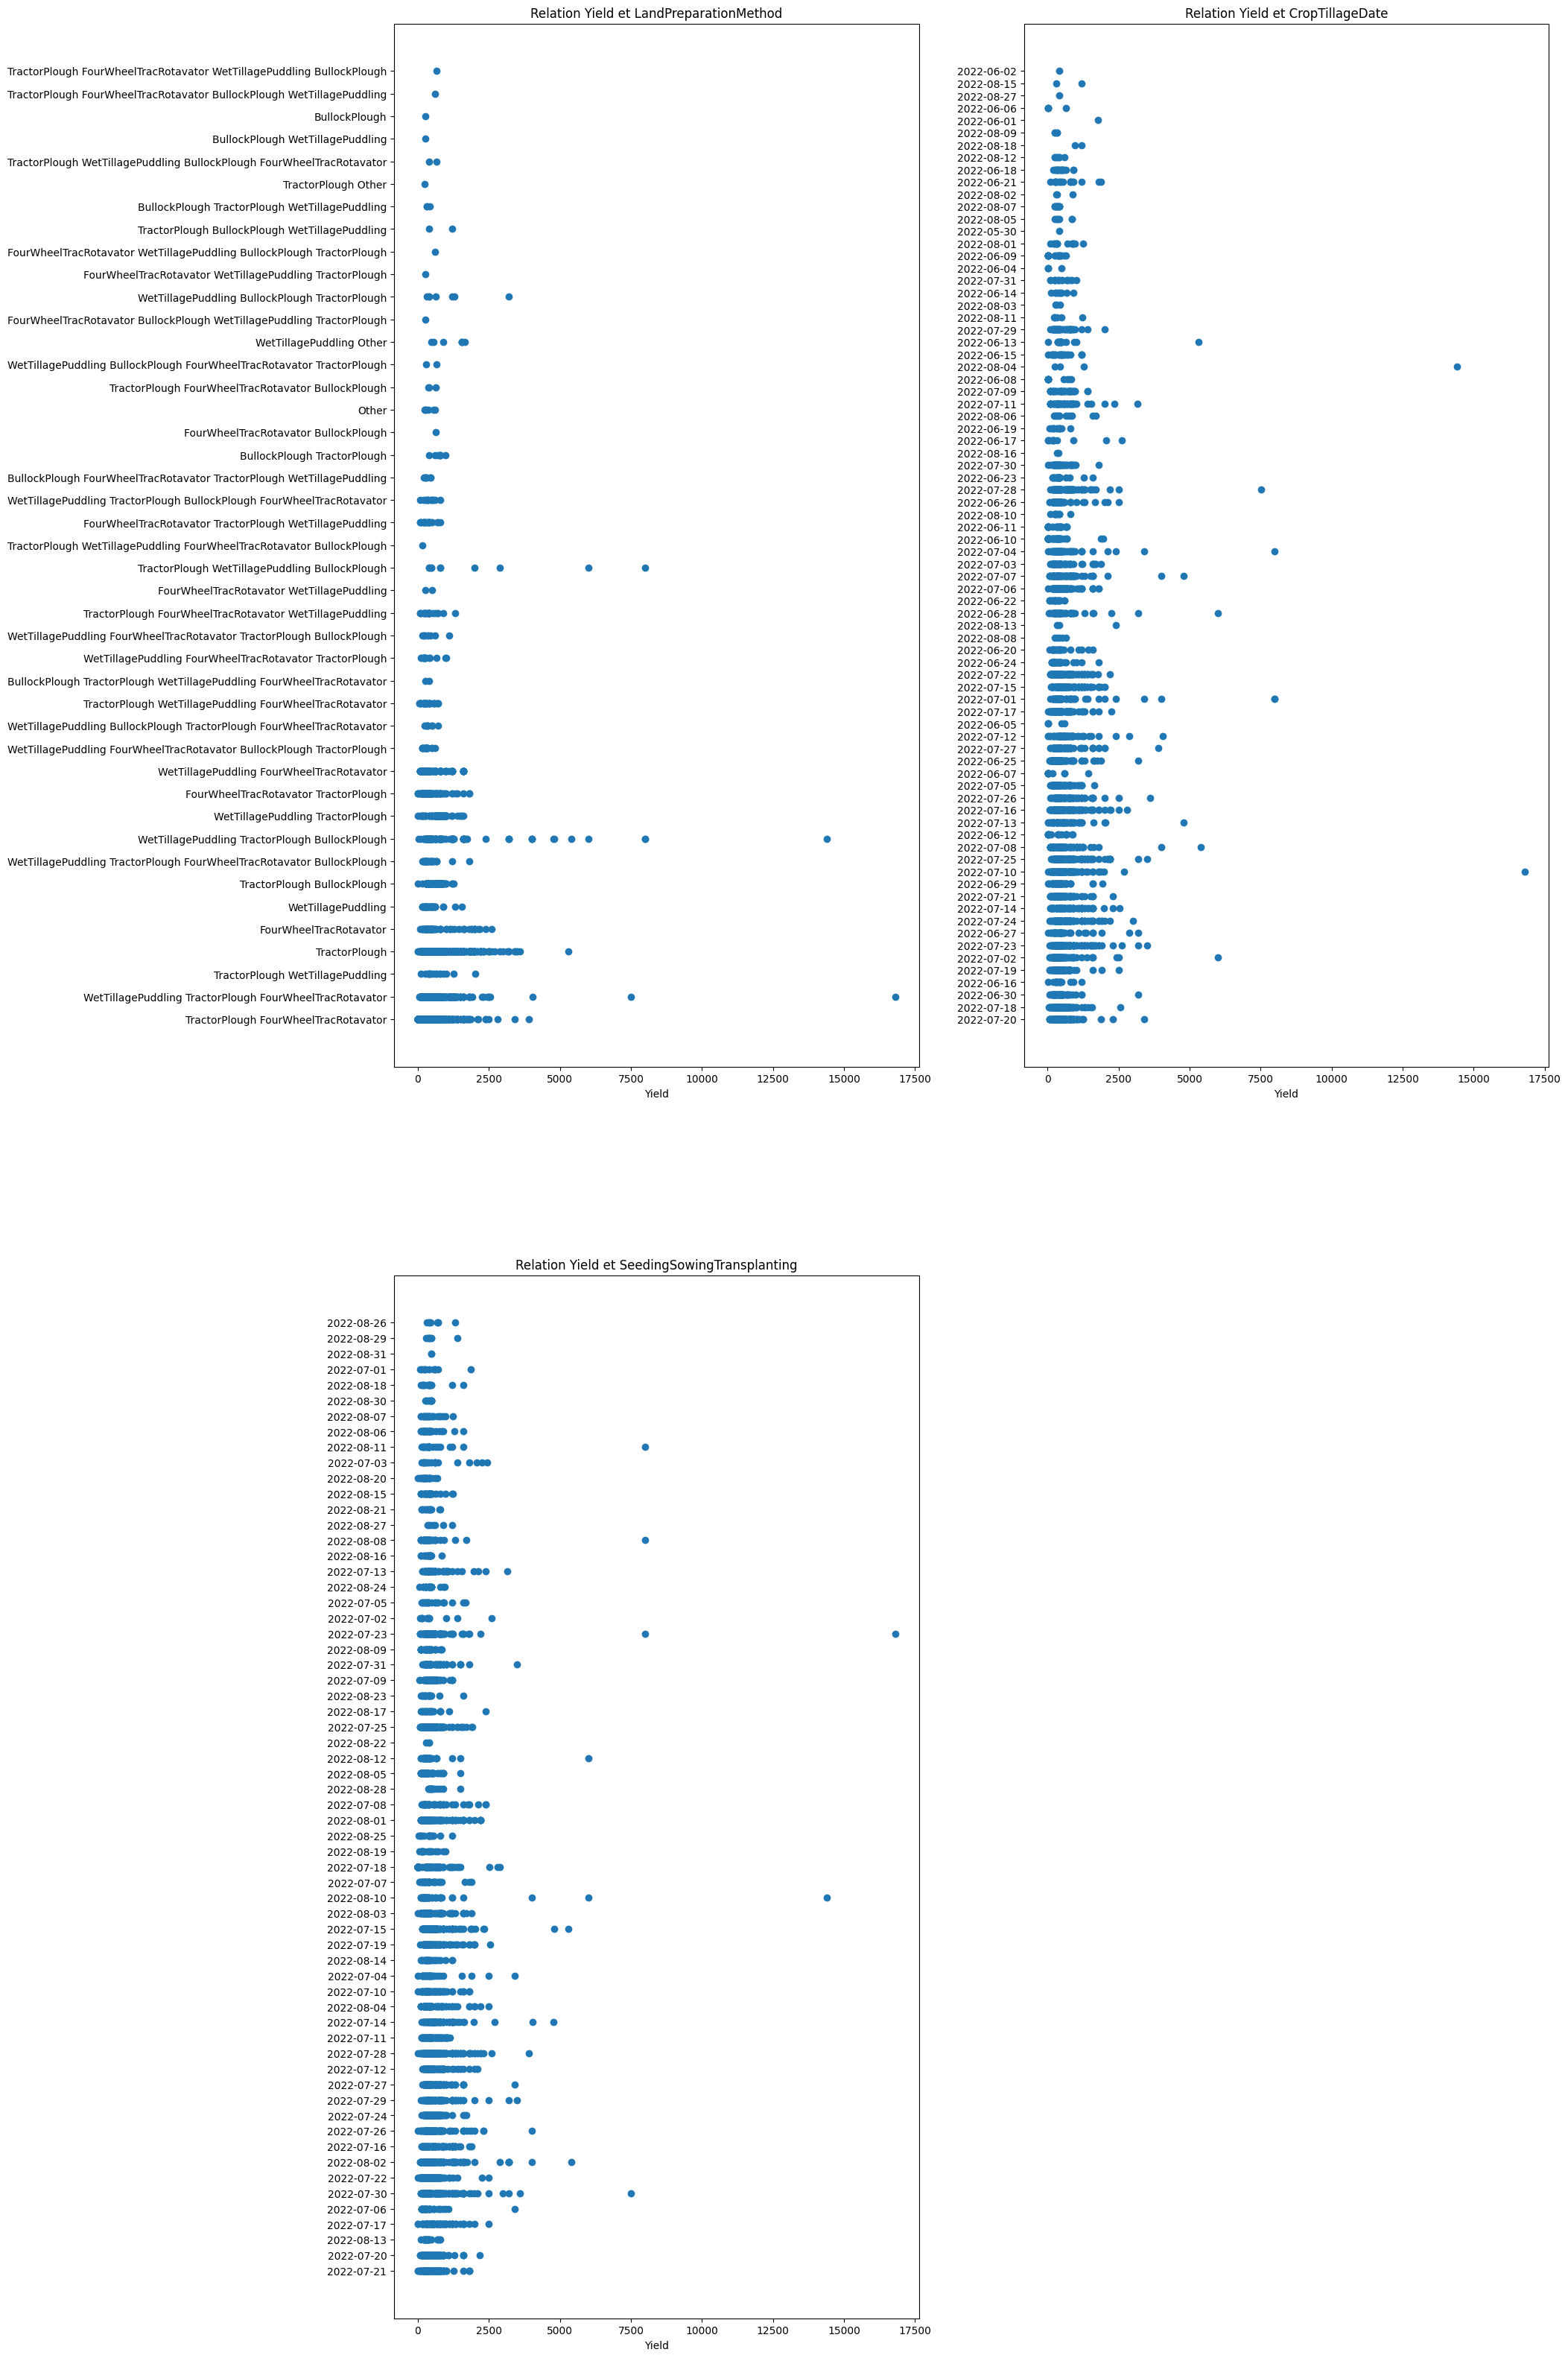

In [ ]:
i=1
plt.figure(figsize=(20,40))
for col in df[["LandPreparationMethod","CropTillageDate","SeedingSowingTransplanting"]]:
    plt.subplot(2,2,i)
    plt.scatter(df['Yield'], df[col])
    plt.xlabel("Yield")
    plt.title(f'Relation Yield et {col}')
    i += 1
plt.show()

On ne semble pas observer de valeurs aberrantes significatives dans la colonne "CropTillageDate". Cependant, il est à noter qu'il y a quelques outliers à prendre en considération dans la colonne "SeedingSowingTransplanting".




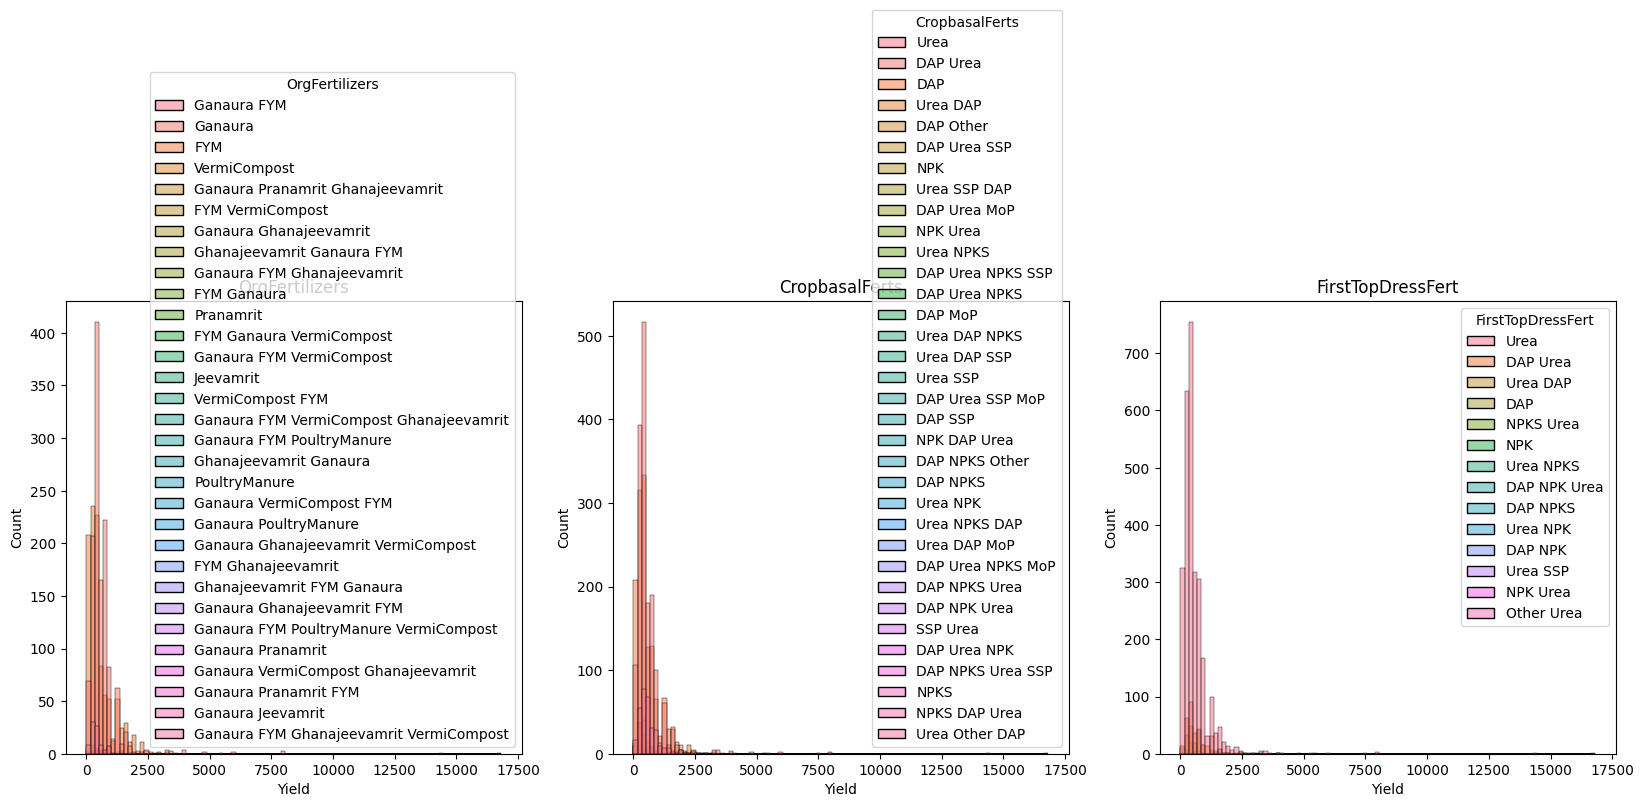

In [ ]:
i=1
plt.figure(figsize=(20,20))
for col in df[["OrgFertilizers","CropbasalFerts","FirstTopDressFert"]]:
    plt.subplot(3,3,i)
    sns.histplot(x='Yield',hue=col,data=df, bins=100)
    plt.xlabel("Yield")
    plt.title(col)
    i += 1
plt.show()


Malgré la complexité de la lecture de ce graphique, il est notable que l'engrais le plus largement utilisé et ayant un impact significatif sur le rendement dans la catégorie "FirstTopDressFert" est l'Urea. De même, dans la catégorie "CropbasalForts", le DAP Urea est l'engrais qui semble avoir le plus d'impact sur le rendement. Ces observations mettent en avant l'influence spécifique de certains types d'engrais sur le rendement des cultures.

Certainement, passons maintenant à l'analyse des relations entre les variables qualitatives. L'exploration de ces relations peut fournir des informations cruciales sur les interactions et les tendances dans nos données.

##### Relation entre variables quantitative.

 Plutôt que d'examiner toutes les relations entre les variables qualitatives, concentrons-nous sur celles qui ont une dépendance entre elles.

#### Relation entre la méthode de préparation du sol et la méthod d'application d'engrais organique dans la culture précédente pendant la préparation du sol.

<Axes: xlabel='PCropSolidOrgFertAppMethod', ylabel='LandPreparationMethod'>

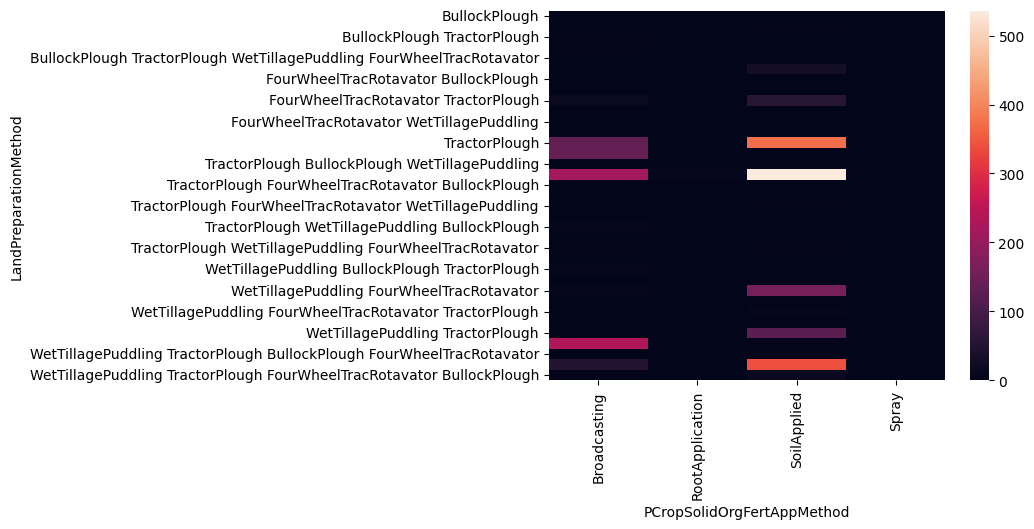

In [ ]:
sns.heatmap(pd.crosstab(df['LandPreparationMethod'],df['PCropSolidOrgFertAppMethod']))

Dans la préparation du terrain, "SoilApplied" est la méthode la plus largement utilisée, suivie de "Broadcasting". En revanche, les méthodes "RootApplication" et "Spray" semblent être largement négligées. Ces observations mettent en évidence les préférences des agriculteurs en matière


#### Relation entre la méthode de préparation du sol et le type d'engrais chimique appliqué pendant la préparation du sol

<Axes: xlabel='CropbasalFerts', ylabel='LandPreparationMethod'>

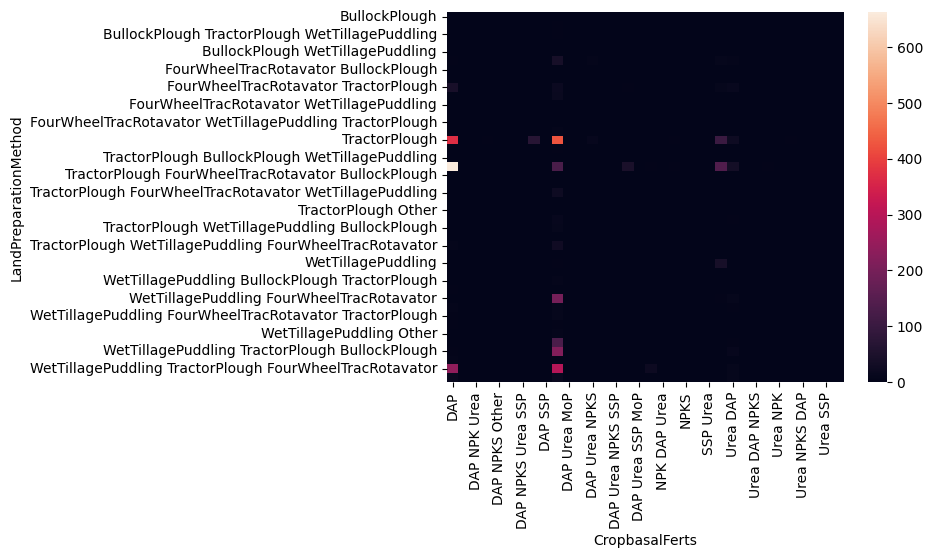

In [ ]:
sns.heatmap(pd.crosstab(df['LandPreparationMethod'],df['CropbasalFerts']))

Il semble que le DAP (Diammonium phosphate) et le SSP (Single Super Phosphate) soient les plus utilisés pour la préparation du terrain.

#### Relation entre la méthode de préparation du sol et Quantité de DAP (en kg) appliquée pendant la préparation du sol

<Axes: xlabel='BasalDAP', ylabel='LandPreparationMethod'>

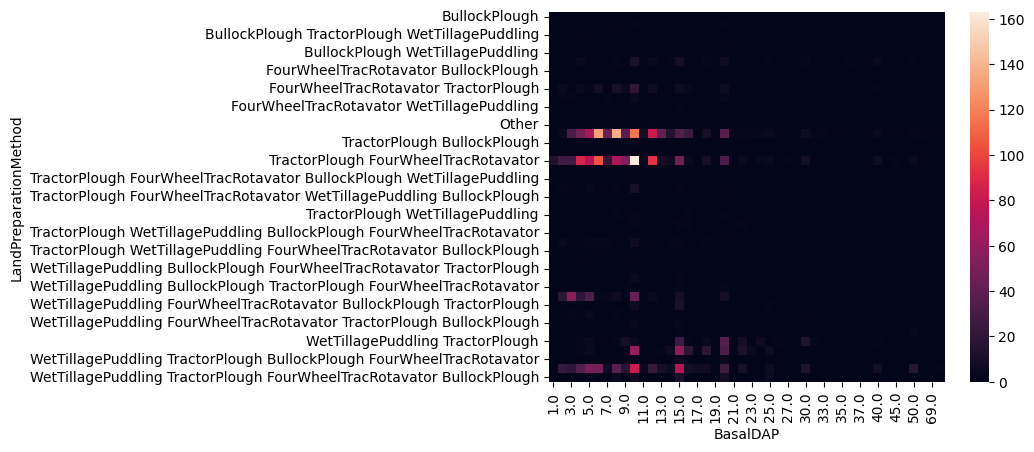

In [ ]:
sns.heatmap(pd.crosstab(df['LandPreparationMethod'],df['BasalDAP']))

On observe qu'il existe une certaine relation entre BasalDAP. Il serait préférable d'analyser cela de manière progressive.

#### Relation entre la méthode de préparation du sol et Quantité d'urée (en kg) appliquée pendant la préparation du sol

<Axes: xlabel='BasalUrea', ylabel='LandPreparationMethod'>

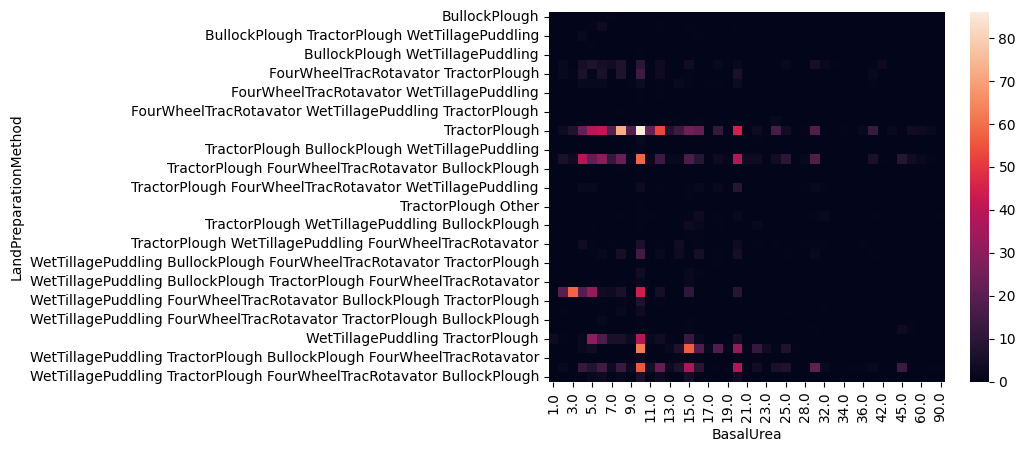

In [ ]:
sns.heatmap(pd.crosstab(df['LandPreparationMethod'],df['BasalUrea']))

On observe qu'il existe une certaine relation entre BasalDAP. Il serait préférable d'examiner cela de manière méthodique, en analysant chaque aspect petit à petit.

#### Relation entre District et block

<Axes: xlabel='Block', ylabel='District'>

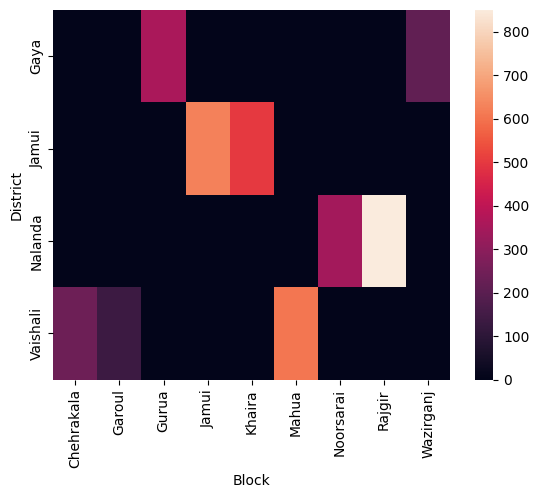

In [ ]:
sns.heatmap(pd.crosstab(df['District'],df['Block']))

Il semble y avoir une corrélation significative entre Vaishali et Cherhrakala, de même qu'entre Gaya et Wazirganj.

### II. PRE-PROCESSING ET MODELISATION:

In [ ]:
df=data.copy()


In [ ]:
df = df.fillna(df.mean())
df=df.drop(['StandingWater','TransplantingIrrigationHours','SeedlingsPerPit'], axis = 1)

<ipython-input-48-643bed47da57>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Copie du dataframe
train = df.copy()

# Enlevons les colonne  'ID' and 'Yield' et selectionnons les colonnes numérique
X = df.drop(['ID', 'Yield'], axis = 1)
X = X.select_dtypes(include=np.number)

# Definition du target
y = train.Yield

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1234)

# Creation du pipeline
pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='mean')),
  ('regressor', RandomForestRegressor(random_state=1234))
])

# Définir la grille de paramètres
param_grid = {
  'regressor__n_estimators': [500, 1000],
  'regressor__max_depth': [10, 20],
  'regressor__min_samples_split': [20, 50],
  'regressor__min_samples_leaf': [10, 20],
  'regressor__max_features': ['sqrt', 'log2']
}

# Creation de objet GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Adapter l'objet GridSearchCV aux données
grid_search.fit(X_train, y_train)

#Obtenir les meilleurs paramètres
best_params = grid_search.best_params_
print(best_params)

# Faire des predictions
y_pred = grid_search.predict(X_test)

model = grid_search.best_estimator_
# Evaluer model
mse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Mean Squared Error: {mse}')

{'regressor__max_depth': 20, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 20, 'regressor__n_estimators': 1000}
Mean Squared Error: 405.07271640591983


In [ ]:
# Make predictions on the Zindi test set
test_df = test[X.columns]
preds = model.predict(test_df)

# Create submisiion file to be uploaded to Zindi for scoring
sub = pd.DataFrame({'ID': test.ID, 'Yield': preds})
sub.to_csv('BenchmarkSubmission.csv', index = False)

sub.head()

ID       Yield
0  ID_F9XXEXN2ADR2  571.127560
1  ID_SO3VW2X4QO93  418.281683
2  ID_UKUQ7JM8E894  610.549823
3  ID_QUISMWEZR2H4  303.438113
4  ID_25JGI455VKCZ  563.811099

### III. CONCLUSION:

Dans notre compte rendu, nous avons pu procéder à l'analyse exploratoire des données, ce qui nous a permis de mieux comprendre nos variables cibles et l'ensemble des variables, ainsi que leurs relations mutuelles.

En résultat, nous avons obtenu une "mean_squared_error" de 405.072. Cette métrique fournit une indication de la précision de notre modèle, avec une valeur plus basse indiquant généralement une meilleure performance. Il est essentiel de continuer à affiner notre modèle et d'explorer d'autres aspects des données pour améliorer davantage les résultats.

Sur le "leaderboard" de Zindi, nous avons obtenu un score public de 390.2749508 et un score privé de 153.7738997. Ces scores reflètent la performance de notre modèle sur les données de test publiques et privées respectivement.








-------------------------------------------------------------------------

Référence:

- L'amélioration de la rédaction a été effectuée par ChatGPT.
- Certains code a été efectué par le moteurs de recherche IA pour les dévélloppeur "le Phind".


